# Installe, charge et affiche la version des packages

In [ ]:
# Créer un environnement anaconda
#conda create proj1_env

# Installer un pacakge avec conda
#!conda install matplotlib

# Installer un package avec pip
#!pip install pandas



In [2]:
!pip show matplotlib
print("\n")
!pip show pandas
print("\n")
!pip show numpy

Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /media/felix/2bbafeba-9213-47d8-8cff-0f44dd5ad585/home/felix/lib/python3.10/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


Name: pandas
Version: 2.0.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided tha

# ANALYSE

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import operator
import numpy as np

## Charge le dataframe principal et créer un dictionnaire de correspondance pour les codes et noms des pays et indicateurs

In [2]:
# Open and store files
df = pd.read_csv("Data/EdStatsData.csv")
df_series = pd.read_csv("Data/EdStatsSeries.csv")


In [3]:
### ANALYSE - Créer un dictionnaire des correspondance pour les pays (code - nom)

countries_dict = dict(zip(df["Country Code"], df["Country Name"]))
indicators_dict = dict(zip(df["Indicator Code"], df["Indicator Name"]))

## Sélection des familles d'indicateurs

In [4]:
### ANALYSE - Choix des topics à garder

topics = [
    "Literacy",
    "Infrastructure: Communications",
    "Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators",
    "Secondary",
    "Tertiary",
    "Expenditures",
    "Social Protection & Labor: Unemployment",
    "Population",
    "Health: Population: Dynamics",
    "Teachers",
]

In [5]:
### ANALYSE - Stockage de tous les indicateurs dans les topics d'intérêts et filtre sur le DF global

indicator_names = df_series[df_series["Topic"].isin(topics)]["Indicator Name"]

df_selected_topics = df[df["Indicator Name"].isin(indicator_names)]

## Sélectionne les années d'intérêt et analyse les valeurs manquantes

In [6]:
### ANALYSE - Filtre en gardant que les années (colonnes) d'intérêt (2000 et +)

selected_years = df.columns[51:33:-1]
print(selected_years)

Index(['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000'],
      dtype='object')


In [7]:
### ANALYSE - Avec mes données filtrées (années d'intérêt + topics d'intérêt), quelles années ont le moins de valeurs manquantes ?
### Même chose que plus haut mais avec moins d'années

missing_values_count = []

for year in selected_years:
    missing_count = df_selected_topics[year].isnull().sum()
    missing_values_count.append((year, missing_count))

# Trier la liste par nombre de valeurs manquantes croissant
sorted_missing_values_count = sorted(missing_values_count, key=lambda x: x[1])

for year, missing_count in sorted_missing_values_count:
    print(f"{year} : {missing_count} valeurs manquantes")

2011 : 116026 valeurs manquantes
2012 : 117577 valeurs manquantes
2010 : 117920 valeurs manquantes
2013 : 118136 valeurs manquantes
2009 : 119027 valeurs manquantes
2008 : 119875 valeurs manquantes
2007 : 121617 valeurs manquantes
2004 : 122044 valeurs manquantes
2005 : 122495 valeurs manquantes
2006 : 123663 valeurs manquantes
2002 : 123776 valeurs manquantes
2001 : 125484 valeurs manquantes
2003 : 125489 valeurs manquantes
2000 : 126608 valeurs manquantes
2014 : 127266 valeurs manquantes
2015 : 160445 valeurs manquantes
2016 : 196054 valeurs manquantes
2017 : 203764 valeurs manquantes


In [8]:
### ANALYSE - Sélection de l'année avec le moins de valeurs manquantes pour les topics d'intérêts

selected_year = sorted_missing_values_count[0][0]
print(selected_year)

2011


## Sélectionne les indicateurs finaux avec leur valeur la plus récente et ajoute de nouveaux indicateurs

In [9]:
### ANALYSE - Stockage de tous les indicateurs d'intérêt et filtre sur le DF global
### Création d'un sous-DF que pour les indicateurs d'intérêt
### Création d'un dictionnaire pour faire correspondre les codes et les noms des indicateurs (performance)

selected_indicators = [
    "Adult literacy rate, population 15+ years, both sexes (%)",
    "Internet users (per 100 people)",
    "GDP per capita (current US$)",
    "Expenditure on secondary as % of government expenditure on education (%)",
    "Expenditure on tertiary as % of government expenditure on education (%)",
    "Expenditure on education as % of total government expenditure (%)",
    "Enrolment in tertiary education per 100,000 inhabitants, both sexes",
    "Pupil-teacher ratio in tertiary education (headcount basis)",
    "Survival rate to the last grade of lower secondary general education, both sexes (%)",
]

# Filtre le DF global en ne gardant que les lignes avec les indicateurs d'intérêt
df_selected_indicators = df[df["Indicator Name"].isin(selected_indicators)].copy()

In [10]:
### ANALYSE - Filtre du DF global sur les années (colonnes) les plus récentes sans valeur manquante pour chaque indicateur (si il y a au moins une valeur)

# Initialiser les colonnes "value" et "year of value"
df_selected_indicators["Value"] = np.nan
df_selected_indicators["Year"] = np.nan

# Parcourir les lignes du DataFrame
for index, row in df_selected_indicators.iterrows():
    # Parcourir les colonnes sélectionnées
    for year in selected_years:
        # Vérifier si la valeur est manquante
        if pd.notna(row[year]):
            # Remplir les colonnes "value" et "year of value"
            df_selected_indicators.at[index, "Value"] = row[year]
            df_selected_indicators.at[index, "Year"] = year
            break  # Sortir de la boucle si une valeur est trouvée


In [11]:
### ANALYSE - Filtre du DF des indicateurs sélectionnés sur l'année sélectionnée
df_selected_values = df_selected_indicators[[
    'Country Code', 
    'Indicator Code',
    "Value",
    "Year",
]]

df_selected_values.head(10)

,Country Code,Indicator Code,Value,Year
20,ARB,SE.ADT.LITR.ZS,77.364586,2014
1201,ARB,UIS.TE_100000.56,NaN,NaN
1224,ARB,SE.XPD.TOTL.GB.ZS,NaN,NaN
1236,ARB,SE.XPD.SECO.ZS,NaN,NaN
1238,ARB,SE.XPD.TERT.ZS,NaN,NaN
1245,ARB,NY.GDP.PCAP.CD,7715.998677,2013
1375,ARB,IT.NET.USER.P2,36.868602,2013
2553,ARB,UIS.PTRHC.56,NaN,NaN
2954,ARB,UIS.SR.2.GPV.GLAST.CP.T,NaN,NaN
3685,EAS,SE.ADT.LITR.ZS,95.108223,2014


In [12]:
### ANALYSE - Création fonction pour ajout de nouveaux indicateurs calculés à partir d'autres

def add_new_indicator(df, indicator1, operator_func, indicator2, \
                      new_indicator_code, selected_indicators_dict, new_indicator_name, selected_indicators):
    
    # Calculate new indicator values
    new_indicator_values = operator_func(df[df["Indicator Code"] == indicator1]["Value"].values, \
                            df[df["Indicator Code"] == indicator2]["Value"].values)

    # Add the new indicator to the DataFrame
    new_rows = pd.DataFrame({
        "Indicator Code": [new_indicator_code] * len(new_indicator_values),
        "Country Code": df[df["Indicator Code"] == indicator1]["Country Code"].values,
        "Value": new_indicator_values
    })

    df = pd.concat([df, new_rows], ignore_index=True)
    
    indicators_dict[new_indicator_code] = new_indicator_name
    selected_indicators.append(new_indicator_name)
    
    return df

In [13]:
### ANALYSE - Définition des nouveaux indicateurs puis ajout au df final et au dictionnaire des correspondances des indicateurs

new_indicators = [
    ["SE.XPD.SECO.ZS", operator.truediv, "SE.XPD.TERT.ZS", "SE.XPD.SE/TE.ZS", "Ratio expenditures secondary/tertiary as % of government expenditure on education (ratio)"],
    ["UIS.SR.2.GPV.GLAST.CP.T", operator.truediv, "UIS.PTRHC.56", "UIS.SR/PTHRC", "Ratio survival to secondary/enrolment in tertiary, both (ratio)"],
]

for new_indicator in new_indicators:
    
    df_selected_values = add_new_indicator(df_selected_values, new_indicator[0], new_indicator[1], new_indicator[2], \
                                 new_indicator[3], indicators_dict, new_indicator[4], selected_indicators)
    
    

C:\Users\Z478SG\AppData\Local\Temp\ipykernel_20952\3884909705.py:7: RuntimeWarning: divide by zero encountered in divide
  new_indicator_values = operator_func(df[df["Indicator Code"] == indicator1]["Value"].values, \


## Réalise le scoring et séléctionne les meilleurs pays ainsi que les pays frontaliers

In [14]:
### ANALYSE - Défini les critères pour le scoring

# Définition votre dictionnaire d'indicateurs et de critères
indicators_criterias = {
    "Adult literacy rate, population 15+ years, both sexes (%)": {
        "<": {
            "criteria": 75,
            "score": 0
        }, 
        ">": {
            "criteria": 90,
            "score": 2
        },
    },
    "Enrolment in tertiary education per 100,000 inhabitants, both sexes": {
        "<": {
            "criteria": 2300,
            "score": 0
        }, 
        ">": {
            "criteria": 4600,
            "score": 2
        },
    },
    "Expenditure on education as % of total government expenditure (%)": {
        "<": {
            "criteria": 10,
            "score": 0
        }, 
        ">": {
            "criteria": 20,
            "score": 2
        },
    },
    "GDP per capita (current US$)": {
        "<": {
            "criteria": 20000,
            "score": 0
        }, 
        ">": {
            "criteria": 40000,
            "score": 2
        },
    },
    "Internet users (per 100 people)": {
        "<": {
            "criteria": 50,
            "score": 0
        }, 
        ">": {
            "criteria": 70,
            "score": 2
        },
    },
    "Pupil-teacher ratio in tertiary education (headcount basis)": {
        "<": {
            "criteria": 15,
            "score": 0
        }, 
        ">": {
            "criteria": 30,
            "score": 2
        },
    },
    "Ratio expenditures secondary/tertiary as % of government expenditure on education (ratio)": {
        "<": {
            "criteria": 1,
            "score": 0
        }, 
        ">": {
            "criteria": 3,
            "score": 2
        },
    },
    "Ratio survival to secondary/enrolment in tertiary, both (ratio)": {
        "<": {
            "criteria": 8,
            "score": 0
        }, 
        ">": {
            "criteria": 16,
            "score": 2
        },
    },
}


In [15]:
### ANALYSE - Attribution d'un score à chaque pays pour chaque indicateur (rang ou score)

def calculate_score(row):
    indicator_name = indicators_dict[row["Indicator Code"]]
    value = row["Value"]

    if indicator_name in indicators_criterias:
        criteria = indicators_criterias[indicator_name]
        if pd.notna(value):
            if value < criteria["<"]["criteria"]:
                return criteria["<"]["score"]
            elif value > criteria[">"]["criteria"]:
                return criteria[">"]["score"]
            else:
                return 1
        else:
            return 0

    return np.nan

# Apply the function to each row in the DataFrame
df_selected_values["Score"] = df_selected_values.apply(calculate_score, axis=1)

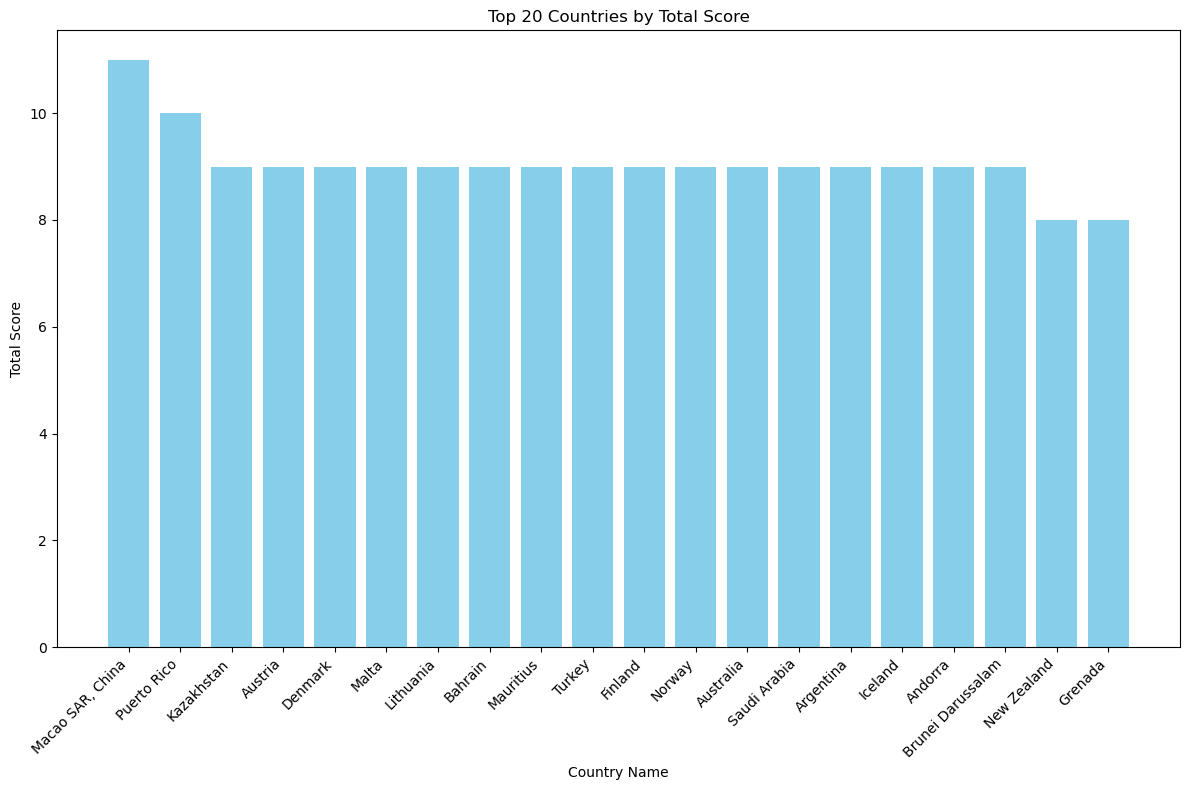

In [16]:
### ANALYSE - Somme de tous les scores pour chaque pays puis affichage des 20 plus gros scores

# Convert the "Score" column to numeric
df_selected_values["Score"] = pd.to_numeric(df_selected_values["Score"], errors='coerce')

# Calculate the sum of scores for each country
country_scores = df_selected_values.groupby("Country Code")["Score"].sum().reset_index()

# Replace "Country Code" with country names using countries_dict
country_scores["Country Name"] = country_scores["Country Code"].map(countries_dict)

# Sort the DataFrame by the sum of scores in descending order
top_20_countries = country_scores.sort_values(by="Score", ascending=False).head(20)
top_10_countries = country_scores.sort_values(by="Score", ascending=False).head(10)

top_20_countries_df = df_selected_values[df_selected_values["Country Code"].isin(top_20_countries["Country Code"])]
top_10_countries_df = df_selected_values[df_selected_values["Country Code"].isin(top_10_countries["Country Code"])]


# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_20_countries["Country Name"], top_20_countries["Score"], color='skyblue')
plt.xlabel('Country Name')
plt.ylabel('Total Score')
plt.title('Top 20 Countries by Total Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



In [17]:
### ANALYSE - Création de la liste des pays frontaliers au top 5
border_countries = ["CUB", "VNM", "CHN", "DOM", "EST", "LVA", "UZB", "KGZ", "ARE", "QAT"]

# EXPLORATION

## Exploration de tous les datasets

In [18]:
### EXPLORATION - Ouvre et stocke les fichiers
df_footnote = pd.read_csv("Data/EdStatsFootNote.csv")
df_country = pd.read_csv("Data/EdStatsCountry.csv")
df_country_series = pd.read_csv("Data/EdStatsCountry-Series.csv")

In [19]:
### EXPLORATION 

print(df_country.shape)
print(df_country.columns.tolist())
print(df_country.describe)
df_country.head()

(241, 32)
['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31']
<bound method NDFrame.describe of     Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afgh

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [20]:
### EXPLORATION 

print(df_country_series.shape)
print(df_country_series.dtypes)
df_country_series.head(50)

(613, 4)
CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [21]:
### EXPLORATION 

print(df.shape)
print(df.columns.tolist())
df.head()

(886930, 70)
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69']


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
### EXPLORATION 

print(df_footnote.shape)
df_footnote.tail()

(643638, 5)


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN


In [23]:
### EXPLORATION 

print(df_series.shape)
print(df_series.columns.tolist())
df_series.head()

(3665, 21)
['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploration des indicateurs

In [24]:
### EXPLORATION - Quels sont les groupes d'indicateurs ?

topics = df_series["Topic"].unique()
print(topics)

['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Teachers' 'Education Management Information Systems (SABER)'
 'Early Child Development (SABER)' 'Engaging the Private Sector (SABER)'
 'School Health and School Feeding (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Student Assessment (SABER)' 'Teachers (SABER)'
 'Tertiary Education (SABER)' 'Workforce Development (SABER)' 'Literacy'
 'Background' 'Primary' 'Secondary' 'Tertiary' 'Early Childhood Education'
 'Pre-Primary' 'Expenditures' 'Health: Risk factors' 'Health: Mortality'
 'Social Protection & Labor: Labor force structure' 'Laber'
 'Social Protection 

In [25]:
### EXPLORATION - Quels sont les indicateurs par groupe ?
for topic in topics:
    print("### " + topic + " ###\n")
    print(df_series[df_series["Topic"]==topic]["Indicator Name"].unique())
    print("\n----------------------\n")

### Attainment ###

['Barro-Lee: Percentage of female population age 15-19 with no education'
 'Barro-Lee: Percentage of population age 15-19 with no education'
 'Barro-Lee: Percentage of female population age 15+ with no education'
 'Barro-Lee: Percentage of population age 15+ with no education'
 'Barro-Lee: Percentage of female population age 20-24 with no education'
 'Barro-Lee: Percentage of population age 20-24 with no education'
 'Barro-Lee: Percentage of female population age 25-29 with no education'
 'Barro-Lee: Percentage of population age 25-29 with no education'
 'Barro-Lee: Percentage of female population age 25+ with no education'
 'Barro-Lee: Percentage of population age 25+ with no education'
 'Barro-Lee: Percentage of female population age 30-34 with no education'
 'Barro-Lee: Percentage of population age 30-34 with no education'
 'Barro-Lee: Percentage of female population age 35-39 with no education'
 'Barro-Lee: Percentage of population age 35-39 with no education'
 

In [26]:
### EXPLORATION - A quoi correspondent certains indicateurs ?

df_series[df_series["Topic"]=="Secondary"]["Long definition"].unique()

array(['Ratio of female gross enrolment ratio for primary and secondary to male gross enrolment ratio for primary and secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.',
       'Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.',
       'Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had

## Exploration et sélection des indicateurs pertinents

In [27]:
### EXPLORATION - Quelles colonnes (dont années) ont le moins de valeurs manquantes ?

missing_values_count = []

for column in df:
    missing_count = df[column].isnull().sum()
    missing_values_count.append((column, missing_count))

# Trier la liste par nombre de valeurs manquantes croissant
sorted_missing_values_count = sorted(missing_values_count, key=lambda x: x[1])

for column, missing_count in sorted_missing_values_count:
    print(f"{column} : {missing_count} valeurs manquantes")

Country Name : 0 valeurs manquantes
Country Code : 0 valeurs manquantes
Indicator Name : 0 valeurs manquantes
Indicator Code : 0 valeurs manquantes
2010 : 644488 valeurs manquantes
2005 : 702822 valeurs manquantes
2000 : 710254 valeurs manquantes
2012 : 739666 valeurs manquantes
2011 : 740918 valeurs manquantes
2009 : 744822 valeurs manquantes
2006 : 746618 valeurs manquantes
2013 : 749421 valeurs manquantes
2007 : 749658 valeurs manquantes
2008 : 752543 valeurs manquantes
1995 : 755569 valeurs manquantes
2015 : 755872 valeurs manquantes
2003 : 756567 valeurs manquantes
2004 : 758116 valeurs manquantes
1990 : 762525 valeurs manquantes
2002 : 762725 valeurs manquantes
2001 : 763421 valeurs manquantes
1999 : 768091 valeurs manquantes
2014 : 773141 valeurs manquantes
1985 : 796634 valeurs manquantes
1980 : 797808 valeurs manquantes
1975 : 799624 valeurs manquantes
1998 : 802016 valeurs manquantes
1994 : 809468 valeurs manquantes
1996 : 810123 valeurs manquantes
1993 : 811137 valeurs manqu

In [28]:
### EXPLORATION - Quelles indicateurs ont le moins de valeurs manquantes pour l'année sélectionnée ?

def print_missing_values(topic):
    """
    Affiche la proportion de valeurs manquantes pour chaque indicateur du topic
    """
    
    missing_percentage_list = []
    
    for indicator in df_series[df_series["Topic"]==topic]["Indicator Name"]:
        
        # Filtre le DF sur 1 seul indicateur
        indicator_data = df[df["Indicator Name"] == indicator]

        # Compter le nombre de valeurs manquantes
        missing_values_2010 = indicator_data["2010"].isnull().sum()

        # Calculer le pourcentage de valeurs manquantes
        total_rows = len(indicator_data)
        missing_percentage = (missing_values_2010 / total_rows) * 100 if total_rows != 0 else 0

        # Ajoute l'info à la liste finale
        missing_percentage_list.append((indicator, missing_percentage))
    
    # Trie les indicateurs du plus au moins rempli (Tri obligatoire pour vue d'ensemble)
    sorted_missing_percentage_list = sorted(missing_percentage_list, key=lambda x: x[1], reverse=False)

    # Affiche les résultats
    for indicator, missing_percentage in sorted_missing_percentage_list:
        print(f"{indicator} : {missing_percentage:.2f}%")

In [29]:
for topic in topics:
    print(f"\n### {topic} ###\n")
    print_missing_values(topic)


### Attainment ###



KeyboardInterrupt: 

## (Obsolète) Sélection d'une année commune pour tous les indicateurs

In [30]:
### EXPLORATION - Quelle année est la plus remplie pour chaque indicateur d'intérêt ?
### Utile pour analyse moins précise
### Stock la réponse dans un dictionnaire réutilisable (missing_values_info)

missing_values_info = {}

for indicator in df_selected_indicators["Indicator Code"].unique():
    
    # Filtre le DF global sur 1 seul indicateur
    indicator_df_data = df[df["Indicator Code"] == indicator]

    # Initialise les compteurs
    min_year = None
    min_NA_count = float('inf')
    min_NA_percentage = float('inf')

    for year in selected_years:
        
        # Compte les valeurs manquantes pour 1 année
        NA_count = indicator_df_data[year].isnull().sum()
        total_rows = len(indicator_df_data)
        NA_percentage = (NA_count / total_rows) * 100 if total_rows != 0 else 0

        # Change la valeur minimum si possible
        if NA_count < min_NA_count:
            min_year = year
            min_NA_count = NA_count
            min_NA_percentage = NA_percentage

    # Pour l'indicateur actuel, stock l'année avec le moins de valeurs manquantes
    if min_year is not None:
        missing_values_info[indicator] = min_year

    # Affiche le résultat pour l'indicateur actuel
    print(f"{indicators_dict[indicator]} - {min_year} : {min_NA_count} NAs ({min_NA_percentage:.2f}%)")

Adult literacy rate, population 15+ years, both sexes (%) - 2011 : 165 NAs (68.18%)
Enrolment in tertiary education per 100,000 inhabitants, both sexes - 2011 : 104 NAs (42.98%)
Expenditure on education as % of total government expenditure (%) - 2010 : 118 NAs (48.76%)
Expenditure on secondary as % of government expenditure on education (%) - 2010 : 134 NAs (55.37%)
Expenditure on tertiary as % of government expenditure on education (%) - 2010 : 126 NAs (52.07%)
GDP per capita (current US$) - 2006 : 12 NAs (4.96%)
Internet users (per 100 people) - 2011 : 13 NAs (5.37%)
Pupil-teacher ratio in tertiary education (headcount basis) - 2012 : 135 NAs (55.79%)
Survival rate to the last grade of lower secondary general education, both sexes (%) - 2008 : 130 NAs (53.72%)


In [31]:
### EXPLORATION - Pour chaque indicateur, quelle quantité de pays ont une valeur manquante pour l'année sélectionnée  ?
### Pas très utile
### Stockage de la réponse dans un dictionnaire (missing_values_rows)

for indicator in missing_values_info:

    # Filtre les lignes avec une valeur manquante pour l'année sélectionnée
    missing_values_rows = df[(df["Indicator Code"] == indicator) & (df[missing_values_info[indicator]].isnull())]
    NA_count = len(missing_values_rows["Country Name"].tolist())
    
    print(f"{indicators_dict[indicator]} - {NA_count} countries with NAs")

Adult literacy rate, population 15+ years, both sexes (%) - 165 countries with NAs
Enrolment in tertiary education per 100,000 inhabitants, both sexes - 104 countries with NAs
Expenditure on education as % of total government expenditure (%) - 118 countries with NAs
Expenditure on secondary as % of government expenditure on education (%) - 134 countries with NAs
Expenditure on tertiary as % of government expenditure on education (%) - 126 countries with NAs
GDP per capita (current US$) - 12 countries with NAs
Internet users (per 100 people) - 13 countries with NAs
Pupil-teacher ratio in tertiary education (headcount basis) - 135 countries with NAs
Survival rate to the last grade of lower secondary general education, both sexes (%) - 130 countries with NAs


In [32]:
### EXPLORATION - Quelle quantité de pays ont une valeur manquante pour (presque) tous les indicateurs de l'année sélectionnée ?
### Pas très utile
### Stock le nom des pays pour chaque catégorie dans 2 variables (no_values_countries, selected_countries)

# Exclu ces 2 indicateurs car très peu de valeurs manquantes (vu plus haut)
exclude_indicators = [
    "Internet users (per 100 people)", 
    "GDP per capita (current US$)",
]

# Sélectionne les pays avec une valeur manquante dans tous ces indicateurs (sauf les exclus plus haut)
no_values_countries = set(
    df[
        (df["Indicator Code"].isin(df_selected_indicators["Indicator Code"].unique()))
        & (~df["Indicator Name"].isin(exclude_indicators))
        & df.iloc[:, 34:69].isnull().all(axis=1)
    ]["Country Name"].tolist()
)

# Sélectionne les pays avec aucune valeur manquante dans tous les indicateurs
selected_countries = set(df['Country Code'].unique()) - no_values_countries

print(f"Pays avec presque toutes les valeurs manquantes : {len(no_values_countries)}")
print(f"Pays avec moins de valeurs manquantes : {len(selected_countries)}")

Pays avec presque toutes les valeurs manquantes : 140
Pays avec moins de valeurs manquantes : 242


In [ ]:
### EXPLORATION - Par indicateur par pays, quelle proportion de valeurs manquantes y a-t-il sur toutes les années ?
### Pas utile
### /!\ Beaucoup trop long à executer

for country in selected_countries:
    print(f"\n### {countries_dict[country]} ###\n")

    for indicator in indicators_dict:
        
        # Filtre les lignes avec le bon nom de pays et le bon indicateur
        country_indicator_data = df[
            (df["Country Code"] == country) &
            (df["Indicator Code"] == indicator)
        ]

        # Calcule les valeurs manquantes
        missing_count = country_indicator_data[selected_years].isnull().sum().sum()
        total_values = country_indicator_data[selected_years].size
        missing_percentage = (missing_count / total_values) * 100 if total_values != 0 else 0

        # Affiche les résultats
        print(f"{indicators_dict[indicator]} - NAs : {missing_count}, ({missing_percentage:.2f}%)")


### Bolivia ###

Adjusted net enrolment rate, lower secondary, both sexes (%) - NAs : 7, (38.89%)
Adjusted net enrolment rate, lower secondary, female (%) - NAs : 10, (55.56%)
Adjusted net enrolment rate, lower secondary, gender parity index (GPI) - NAs : 10, (55.56%)
Adjusted net enrolment rate, lower secondary, male (%) - NAs : 10, (55.56%)
Adjusted net enrolment rate, primary, both sexes (%) - NAs : 2, (11.11%)
Adjusted net enrolment rate, primary, female (%) - NAs : 2, (11.11%)
Adjusted net enrolment rate, primary, gender parity index (GPI) - NAs : 11, (61.11%)
Adjusted net enrolment rate, primary, male (%) - NAs : 2, (11.11%)
Adjusted net enrolment rate, upper secondary, both sexes (%) - NAs : 9, (50.00%)
Adjusted net enrolment rate, upper secondary, female (%) - NAs : 9, (50.00%)
Adjusted net enrolment rate, upper secondary, gender parity index (GPI) - NAs : 9, (50.00%)
Adjusted net enrolment rate, upper secondary, male (%) - NAs : 9, (50.00%)
Adjusted net intake rate to Grade 1

Africa Dataset: Percentage of lower secondary schools with toilets (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of lower secondary schools without access to electricity (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of lower secondary schools without access to potable water (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of lower secondary schools without toilets (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of male newly recruited teachers in lower secondary education who are trained, male (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of male newly recruited teachers in primary education who are trained, male (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of male newly recruited teachers in upper secondary education who are trained, male (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of male teachers in lower secondary education who are newly recruited, male (%) - NAs : 18, (100.00%)
Africa Dataset: Percentage of male teachers in primary ed

Annual statutory teacher salaries in public institutions in USD. Upper Secondary. 15 years of experience - NAs : 18, (100.00%)
Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary - NAs : 18, (100.00%)
Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Top of scale - NAs : 18, (100.00%)
Barro-Lee: Average years of primary schooling, age 15+, female - NAs : 15, (83.33%)
Barro-Lee: Average years of primary schooling, age 15+, total - NAs : 15, (83.33%)
Barro-Lee: Average years of primary schooling, age 15-19, female - NAs : 15, (83.33%)
Barro-Lee: Average years of primary schooling, age 15-19, total - NAs : 15, (83.33%)
Barro-Lee: Average years of primary schooling, age 20-24, female - NAs : 15, (83.33%)
Barro-Lee: Average years of primary schooling, age 20-24, total - NAs : 15, (83.33%)
Barro-Lee: Average years of primary schooling, age 25+, female - NAs : 15, (83.33%)
Barro-Lee: Average years of primary schooli

Barro-Lee: Average years of total schooling, age 15+, total - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 15-19, female - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 15-19, total - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 20-24, female - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 20-24, total - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 25+, female - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 25+, total - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 25-29, female - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 25-29, total - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 30-34, female - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 30-34, total - NAs : 15, (83.33%)
Barro-Lee: Average years of total schooling, age 35-39, female - NAs : 15, (83.33%)
Barr

Barro-Lee: Percentage of female population age 35-39 with tertiary schooling. Completed Tertiary - NAs : 15, (83.33%)
Barro-Lee: Percentage of female population age 35-39 with tertiary schooling. Total (Incomplete and Completed Tertiary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of female population age 40-44 with no education - NAs : 15, (83.33%)
Barro-Lee: Percentage of female population age 40-44 with primary schooling. Completed Primary - NAs : 15, (83.33%)
Barro-Lee: Percentage of female population age 40-44 with primary schooling. Total (Incomplete and Completed Primary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of female population age 40-44 with secondary schooling. Completed Secondary - NAs : 15, (83.33%)
Barro-Lee: Percentage of female population age 40-44 with secondary schooling. Total (Incomplete and Completed Secondary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of female population age 40-44 with tertiary schooling. Completed Tertiary - NAs : 15, (83.33%)
Barro-Lee: Pe

Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 20-24 with no education - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 20-24 with primary schooling. Total (Incomplete and Completed Primary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 20-24 with secondary school

Barro-Lee: Percentage of population age 60-64 with tertiary schooling. Completed Tertiary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 60-64 with tertiary schooling. Total (Incomplete and Completed Tertiary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 65-69 with no education - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 65-69 with primary schooling. Completed Primary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 65-69 with primary schooling. Total (Incomplete and Completed Primary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 65-69 with secondary schooling. Completed Secondary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 65-69 with secondary schooling. Total (Incomplete and Completed Secondary) - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 65-69 with tertiary schooling. Completed Tertiary - NAs : 15, (83.33%)
Barro-Lee: Percentage of population age 65-69 with tertiary schooling

Current expenditure other than staff compensation as % of total expenditure in upper secondary public institutions (%) - NAs : 13, (72.22%)
DHS: Average years of schooling by age group. Age 15-19 - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Female - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Male - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Quintile 1 - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Quintile 2 - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Quintile 3 - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Quintile 4 - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Quintile 5 - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Rural - NAs : 16, (88.89%)
DHS: Average years of schooling by age group. Age 15-19. Urban - NAs : 16, (88.89%)
DH

DHS: Typology of out-of-school children. Primary. Dropped out. Rural - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Dropped out. Urban - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Female - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Male - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Quintile 1 - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Quintile 2 - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Quintile 3 - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Quintile 4 - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Quintile 5 - NAs : 16, (88.89%)
DHS: Typology of out-of-school children. Primary. Late entry. Rural - NAs : 16, (88.89%)
D

EGRA: Correct Isolated Words Read Per Minute (Mean). Spanish. 3rd Grade - NAs : 18, (100.00%)
EGRA: Correct Isolated Words Read Per Minute (Mean). Spanish. 4th Grade - NAs : 18, (100.00%)
EGRA: Correct Isolated Words Read Per Minute (Mean). Tigrinya. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Isolated Words Read Per Minute (Mean). Tigrinya. 3rd Grade - NAs : 18, (100.00%)
EGRA: Correct Letter Names Read Per Minute (Mean). Afan Oromo. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Letter Names Read Per Minute (Mean). Afan Oromo. 3rd Grade - NAs : 18, (100.00%)
EGRA: Correct Letter Names Read Per Minute (Mean). Amharic. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Letter Names Read Per Minute (Mean). Amharic. 3rd Grade - NAs : 18, (100.00%)
EGRA: Correct Letter Names Read Per Minute (Mean). Bamanankan. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Letter Names Read Per Minute (Mean). Bomu. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Letter Names Read Per Minute (Mean). Chichewa. 2nd

EGRA: Correct Non-Words Read Per Minute (Mean). Kinyarwanda. 4th Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Kinyarwanda. 6th Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Kiswahili. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Lunda. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Luvale. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Nzema. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Sidaamu Afoo. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Sidaamu Afoo. 3rd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Silozi. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Somaligna. 2nd Grade - NAs : 18, (100.00%)
EGRA: Correct Non-Words Read Per Minute (Mean). Somaligna. 3rd Grade - NAs : 18, (100.00%)
EGR

EGRA: Listening Comprehension - Share of students with a zero score (%). Sidaamu Afoo. 3rd Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Silozi. 2nd Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Somaligna. 2nd Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Somaligna. 3rd Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Songhoi. 2nd Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Spanish. 2nd Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Spanish. 3rd Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Spanish. 4th Grade - NAs : 18, (100.00%)
EGRA: Listening Comprehension - Share of students with a zero score (%). Tigriny

EGRA: Oral Reading Fluency - Share of students with a zero score (%). Dagaare. 2nd Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Dagbani. 2nd Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Dangme. 2nd Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). English. 2nd Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). English. 3rd Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). English. 4th Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). English. 6th Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Ewe. 2nd Grade - NAs : 18, (100.00%)
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Fante. 2nd Grade - NAs : 18, (100.00%)
EGRA: Or

EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kinyarwanda. 6th Grade - NAs : 18, (100.00%)
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kiswahili. 2nd Grade - NAs : 18, (100.00%)
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Lunda. 2nd Grade - NAs : 18, (100.00%)
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Luvale. 2nd Grade - NAs : 18, (100.00%)
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Nzema. 2nd Grade - NAs : 18, (100.00%)
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Sidaamu Afoo. 2nd Grade - NAs : 18, (100.00%)
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Sidaamu Afoo. 3rd Grade - NAs : 18, (100.00%)
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Silozi. 2nd Grade - NAs : 18, (100.00%)
Error on the i

## Exploration de la distribution des valeurs pour chaque indicateur

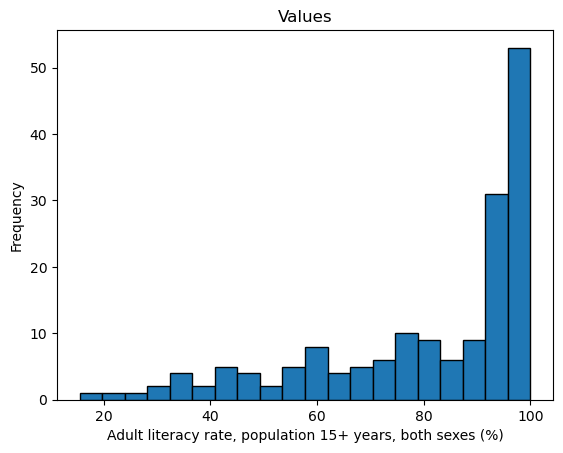

count    168.000000
mean      80.844106
std       20.958707
min       15.456700
25%       69.394682
50%       91.456810
75%       97.127505
max      100.000000
Name: Value, dtype: float64


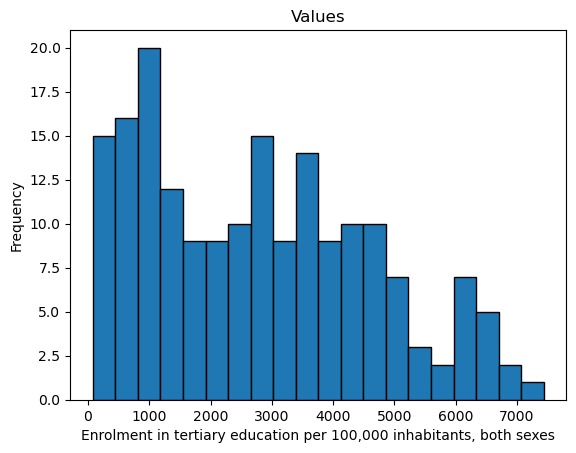

count     185.000000
mean     2800.723742
std      1853.509502
min        80.141518
25%      1132.067505
50%      2705.357422
75%      4218.781250
max      7433.979492
Name: Value, dtype: float64


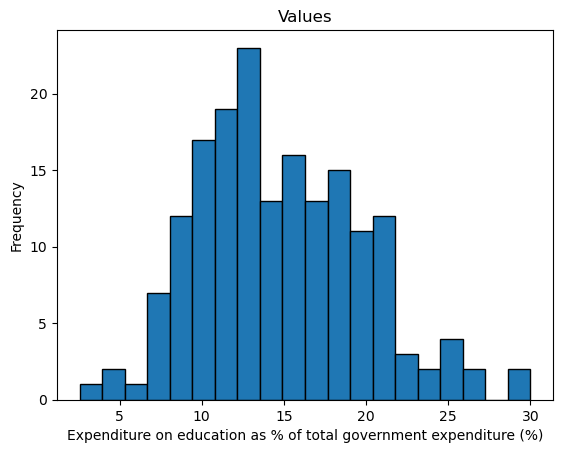

count    175.000000
mean      14.775931
std        5.000861
min        2.563240
25%       11.142750
50%       13.989380
75%       18.550915
max       30.007620
Name: Value, dtype: float64


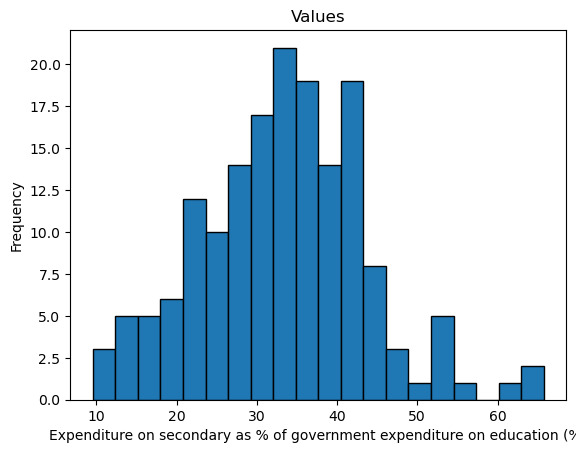

count    166.000000
mean      33.305697
std       10.349683
min        9.564900
25%       26.829472
50%       33.579134
75%       40.280174
max       65.760048
Name: Value, dtype: float64


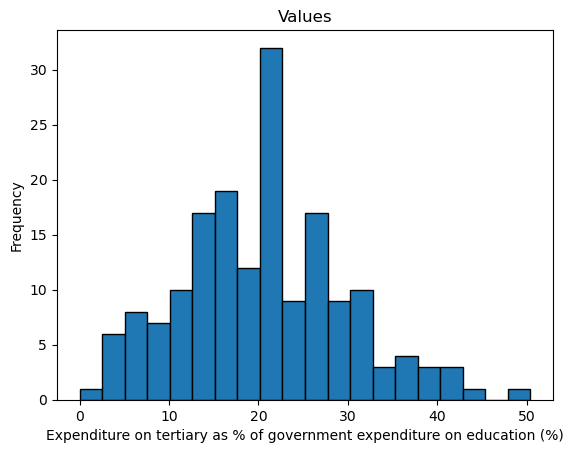

count    172.000000
mean      20.553997
std        9.281419
min        0.000000
25%       14.119800
50%       20.810340
75%       26.267282
max       50.436062
Name: Value, dtype: float64


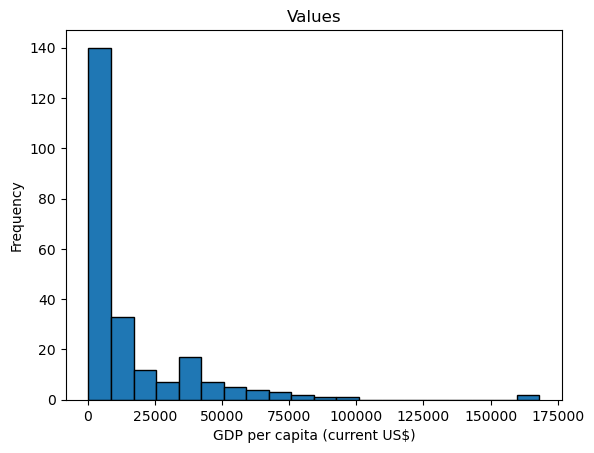

count       234.000000
mean      15877.579276
std       23736.784169
min         285.727442
25%        2063.235277
50%        5964.573900
75%       18351.496141
max      168146.015281
Name: Value, dtype: float64


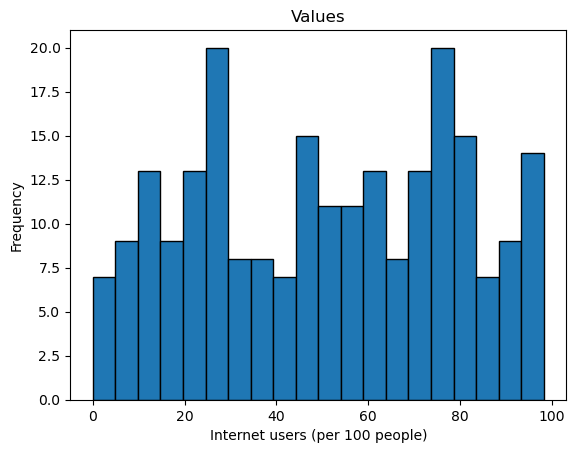

count    230.000000
mean      50.766275
std       27.954465
min        0.000000
25%       25.522606
50%       52.998160
75%       75.498284
max       98.240016
Name: Value, dtype: float64


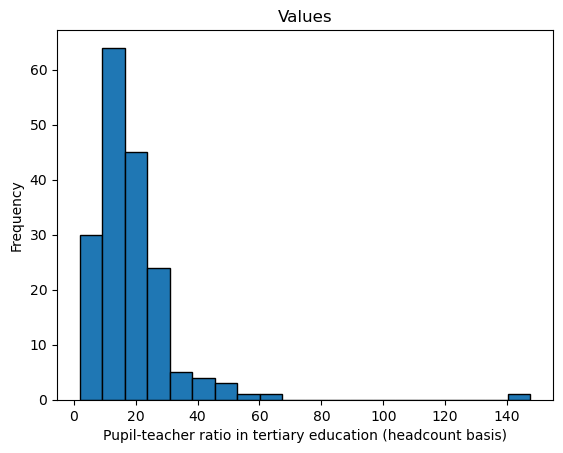

count    178.000000
mean      18.514840
std       14.103647
min        1.871790
25%       10.744017
50%       15.448330
75%       22.506128
max      147.559998
Name: Value, dtype: float64


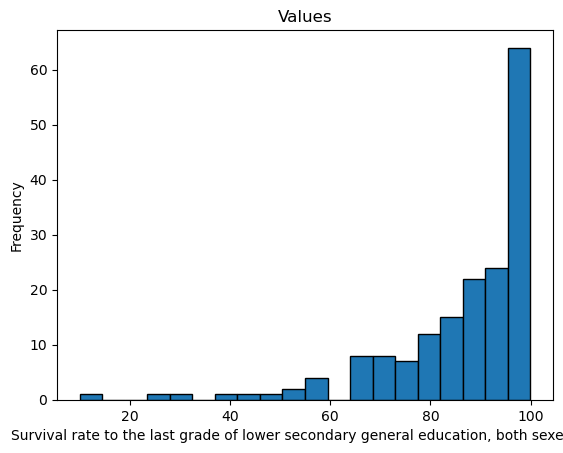

count    172.000000
mean      86.292271
std       15.244116
min        9.962920
25%       80.491196
50%       91.360821
75%       97.116144
max       99.967720
Name: Value, dtype: float64

### Error on the indicator: Ratio expenditures secondary/tertiary as % of government expenditure on education (ratio)


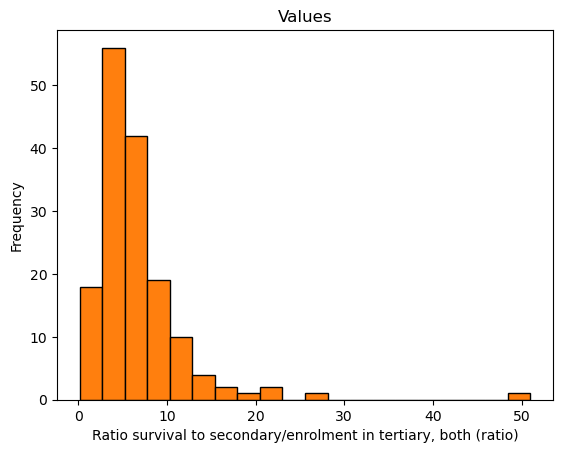

count    156.000000
mean       6.725348
std        5.460039
min        0.154688
25%        3.922166
50%        5.433025
75%        8.020248
max       51.012870
Name: Value, dtype: float64


In [36]:
### EXPLORATION - Comment est répartie la distribution des valeurs pour chaque indicateur ?
### Quels seuils, limites ou scores définir pour ces indicateurs ?

## trouver pourquoi les 2 derniers indicateurs n'affichent rien

for indicator in df_selected_values["Indicator Code"].unique():
    try :
        selected_rows = df_selected_values[df_selected_values["Indicator Code"] == indicator]["Value"].dropna()


        plt.hist(selected_rows, bins=20, edgecolor='black')
        plt.title("Values")
        plt.xlabel(indicators_dict[indicator])
        plt.ylabel("Frequency")
        plt.show()

        print(selected_rows.describe())
        
    except :
            print(f"\n### Error on the indicator: {indicators_dict[indicator]}")

## Exploration des indicateurs des meilleurs pays

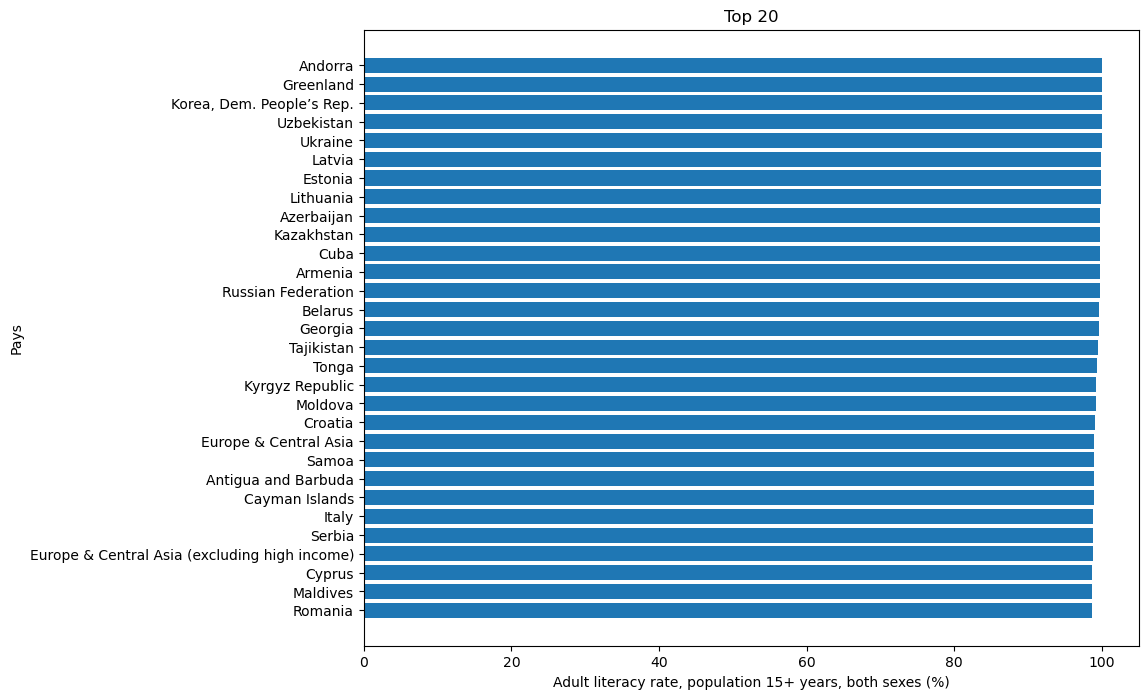

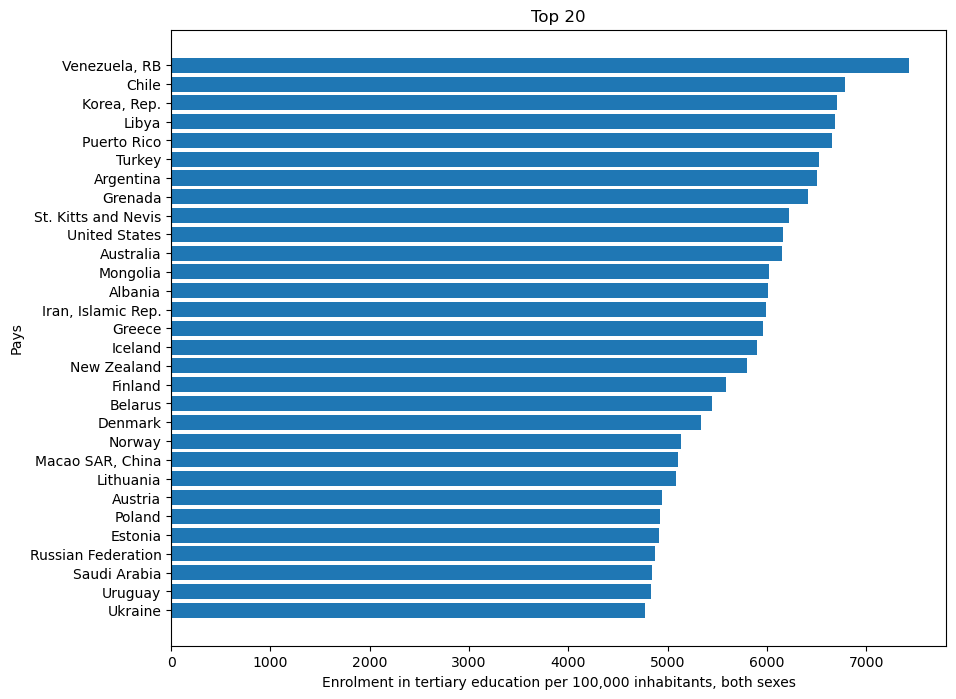

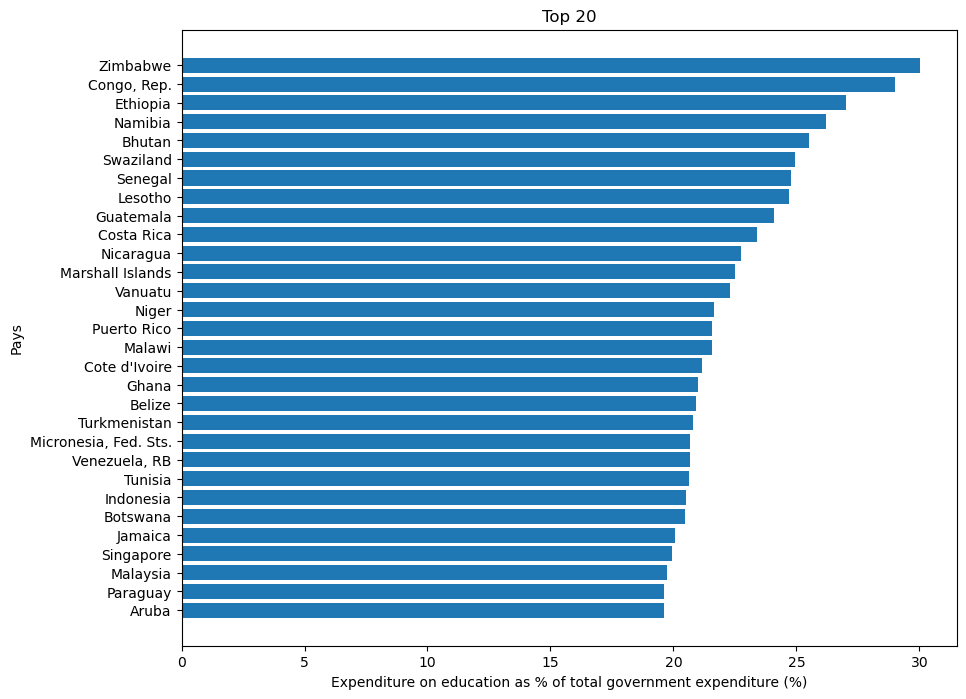

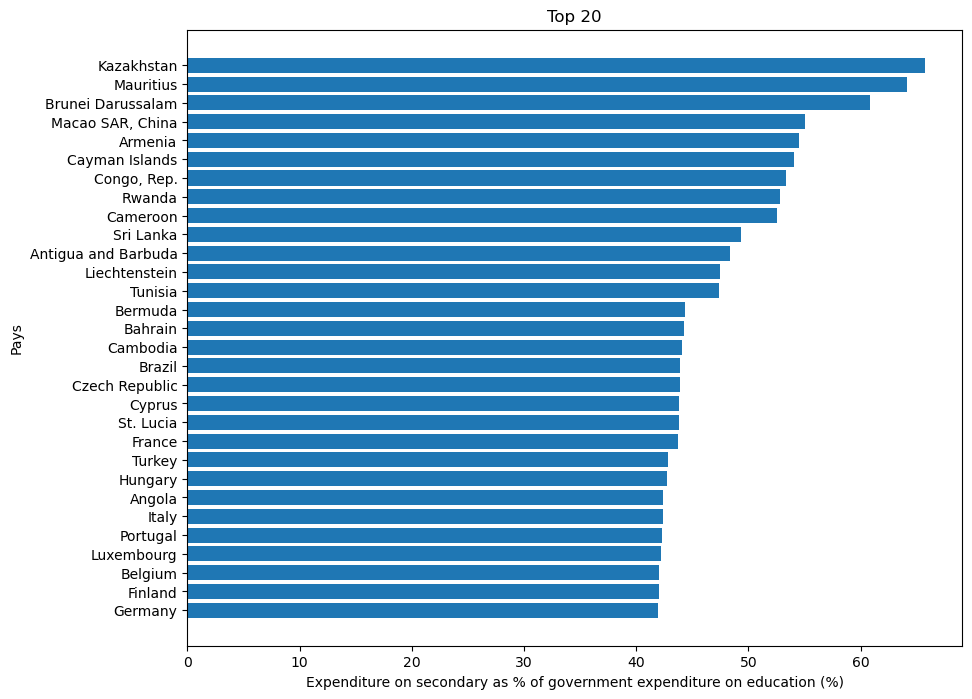

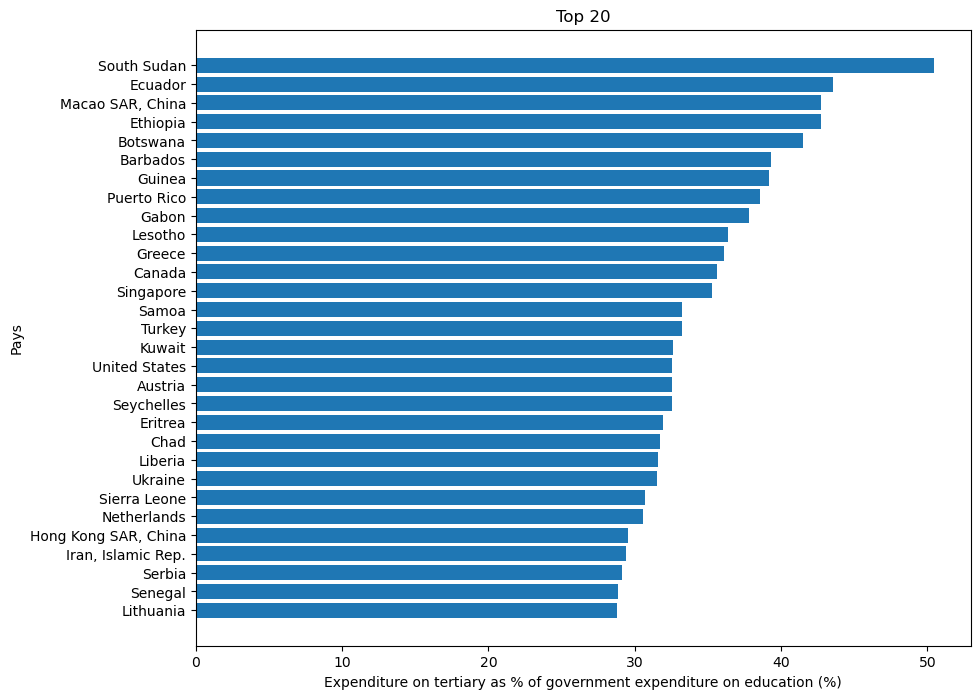

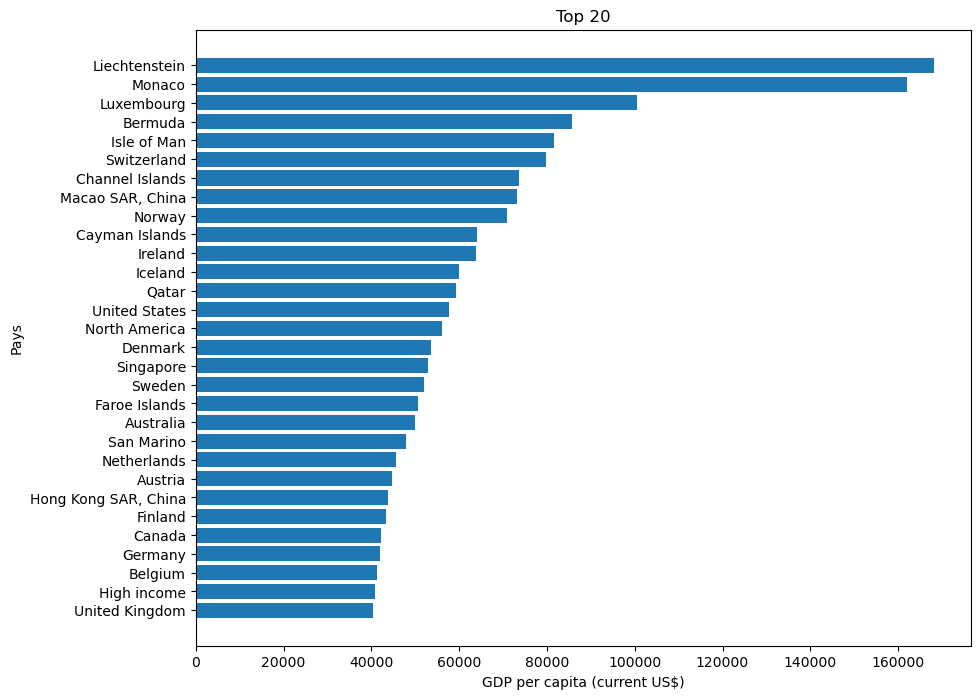

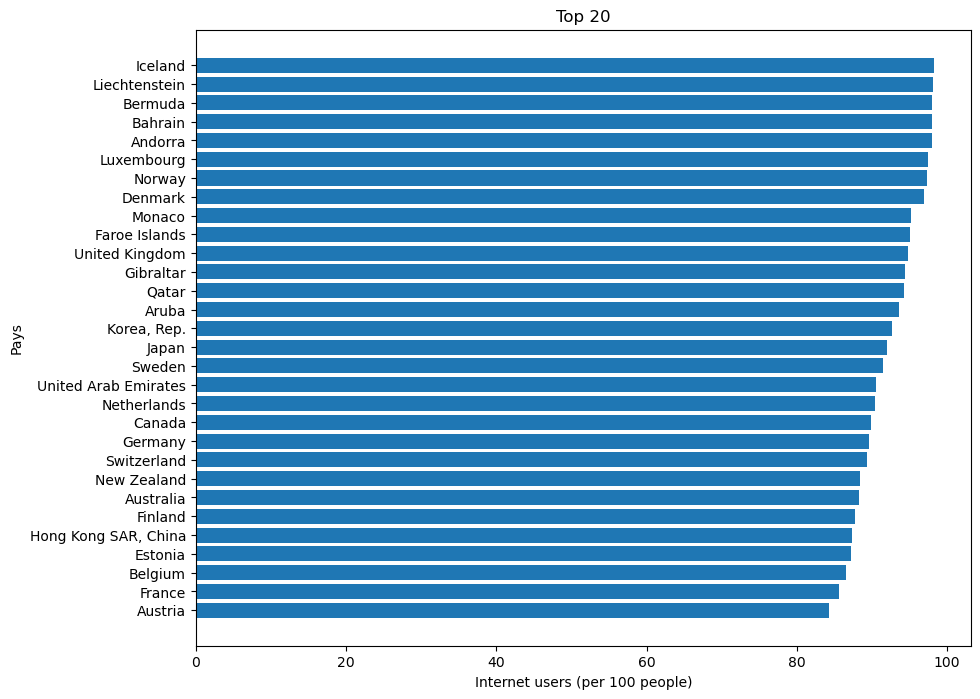

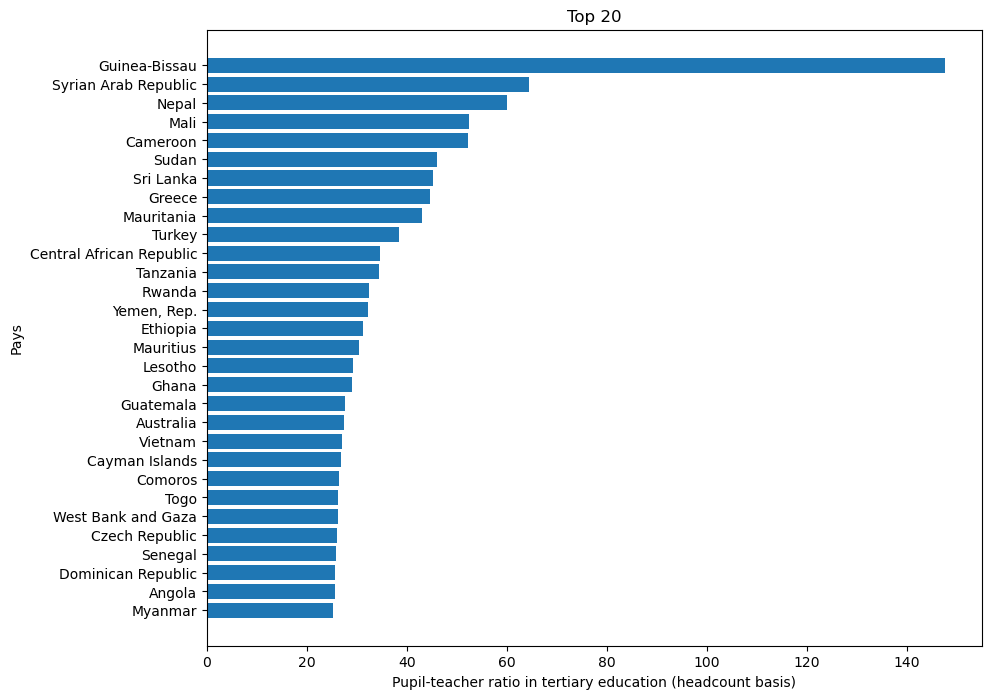

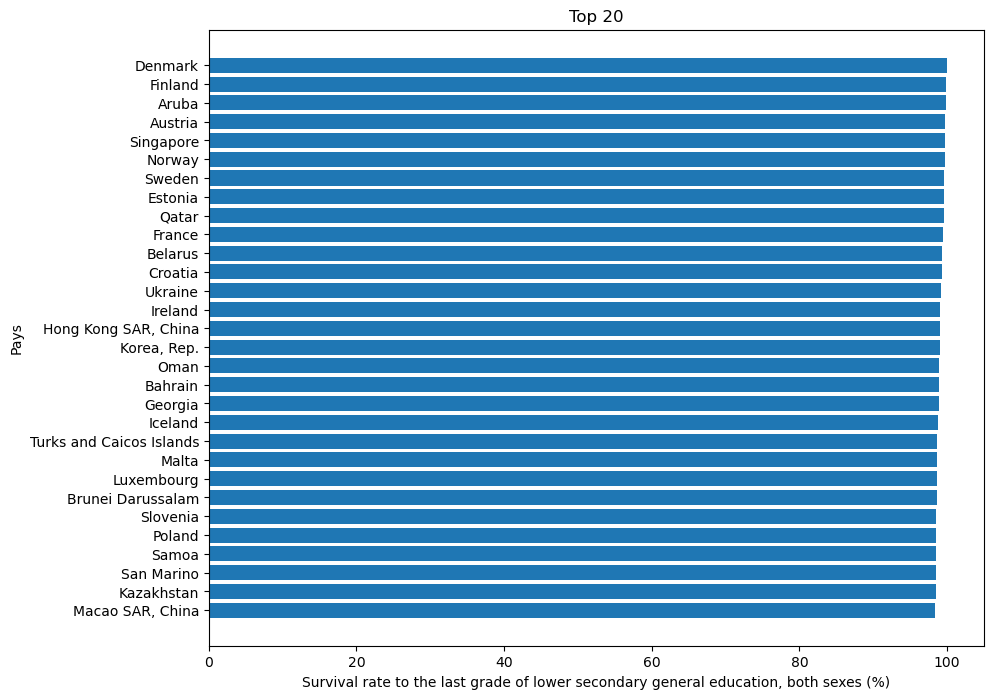

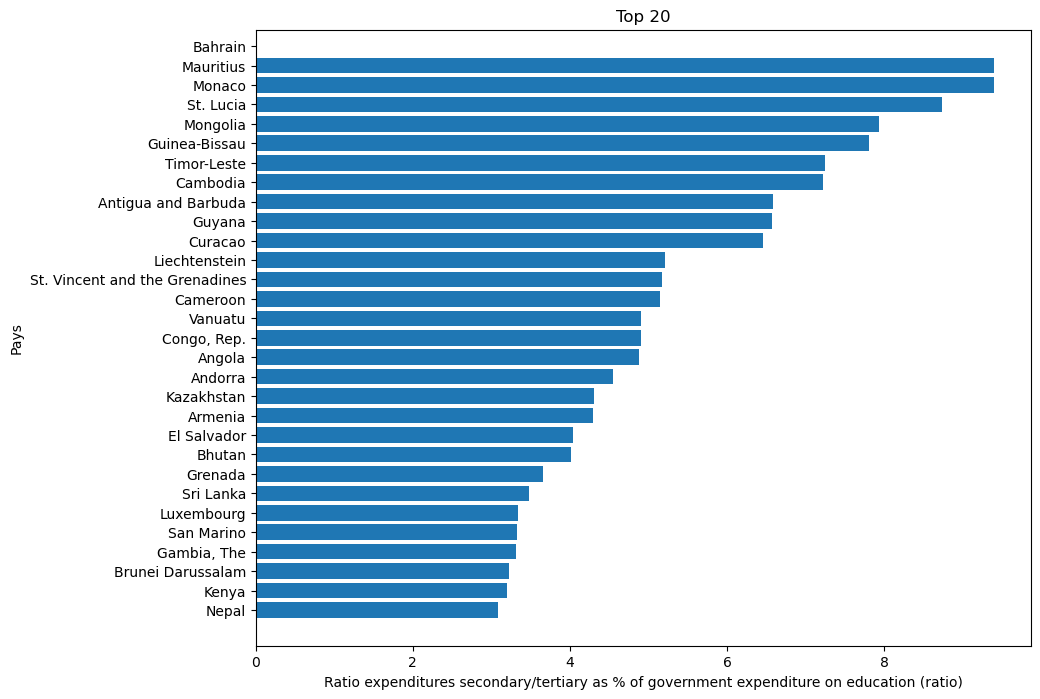

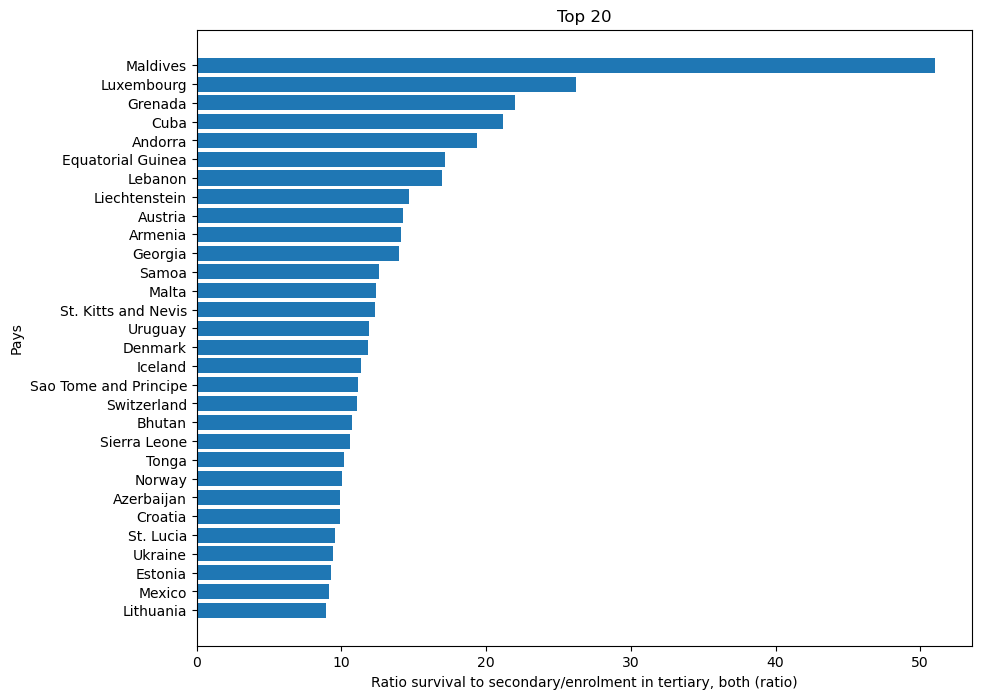

In [37]:
### EXPLORATION - Quels sont les 20 premiers pays avec les plus grandes valeurs pour chaque indicateurs
## Remplacer par sélection des 20 premiers plutot qu'un tri

for indicator in df_selected_values["Indicator Code"].unique():
    # Triez le DataFrame par la colonne de l'indicateur dans l'ordre décroissant
    sorted_df = df_selected_values[df_selected_values["Indicator Code"] == indicator].sort_values(by="Value", ascending=False)

    # Sélectionnez les 20 premières lignes et créez une copie du DataFrame
    top_20_df = sorted_df.head(30).copy().iloc[::-1]

    # Remplacez les codes de pays par les noms de pays dans la copie
    top_20_df["Country Name"] = top_20_df["Country Code"].map(countries_dict)

    # Créez un graphique à barres horizontal
    plt.figure(figsize=(10, 8))
    plt.barh(top_20_df["Country Name"], top_20_df["Value"])
    plt.xlabel(indicators_dict[indicator])
    plt.ylabel('Pays')
    plt.title("Top 20")
    plt.show()

In [38]:
### EXPLORATION - Quels sont les valeurs et les scores de chaque indicateur pour les pays dans le top du classement ?

# Parcours chaque pays
for country in top_20_countries["Country Code"]:
    print(f"\n{countries_dict[country]}:")
    
    # Parcours chaque indicateur
    for indicator in df_selected_values["Indicator Code"].unique():
        indicator_df = top_20_countries_df[(top_20_countries_df["Indicator Code"] == indicator) & (top_20_countries_df["Country Code"] == country)]
        # Collecte et affiche les infos de l'indicateur
        if not indicator_df.empty:
            row = indicator_df.iloc[0]  # Take the first row (assuming there is only one row for each indicator)
            value = row["Value"]
            score = row["Score"]
            year = row["Year"]

            print(f"{score} / {value} / {year} || {indicators_dict[indicator]}")

    print("=" * 50)



Macao SAR, China:
2.0 / 96.53849 / 2016 || Adult literacy rate, population 15+ years, both sexes (%)
2.0 / 5108.19970703125 / 2014 || Enrolment in tertiary education per 100,000 inhabitants, both sexes
1.0 / 13.3920698165894 / 2014 || Expenditure on education as % of total government expenditure (%)
nan / 55.0623092651367 / 2013 || Expenditure on secondary as % of government expenditure on education (%)
nan / 42.7257614135742 / 2014 || Expenditure on tertiary as % of government expenditure on education (%)
2.0 / 73186.9601431088 / 2016 || GDP per capita (current US$)
2.0 / 81.64298546 / 2016 || Internet users (per 100 people)
1.0 / 15.2709703445435 / 2015 || Pupil-teacher ratio in tertiary education (headcount basis)
nan / 98.3656616210938 / 2013 || Survival rate to the last grade of lower secondary general education, both sexes (%)
1.0 / 1.288737928673709 / nan || Ratio expenditures secondary/tertiary as % of government expenditure on education (ratio)
0.0 / 6.441349789945799 / nan |

nan / 99.729118347168 / 2013 || Survival rate to the last grade of lower secondary general education, both sexes (%)
1.0 / 1.3584562682448345 / nan || Ratio expenditures secondary/tertiary as % of government expenditure on education (ratio)
1.0 / 10.045743706517884 / nan || Ratio survival to secondary/enrolment in tertiary, both (ratio)

Australia:
0.0 / nan / nan || Adult literacy rate, population 15+ years, both sexes (%)
2.0 / 6153.1591796875 / 2014 || Enrolment in tertiary education per 100,000 inhabitants, both sexes
1.0 / 13.9000997543335 / 2014 || Expenditure on education as % of total government expenditure (%)
nan / 32.3619918823242 / 2014 || Expenditure on secondary as % of government expenditure on education (%)
nan / 26.5386505126953 / 2014 || Expenditure on tertiary as % of government expenditure on education (%)
2.0 / 49927.8195094751 / 2016 || GDP per capita (current US$)
2.0 / 88.23865805 / 2016 || Internet users (per 100 people)
1.0 / 27.4724903106689 / 2013 || Pupil-t

In [19]:
### EXPLORATION - Quelles sont les valeurs et scores pour chaque indicateur des meilleurs pays ?

# Stocke les indicateurs sans score pour les supprimer par la suite
indicators_without_score = ["SE.XPD.SECO.ZS", "SE.XPD.TERT.ZS", "UIS.SR.2.GPV.GLAST.CP.T"]

# Créer les colonnes du df final et supprime les colonnes sans score
final_table_columns = ["Country Name"] + list(df_selected_values["Indicator Code"].unique()) + ["Cumulative Score"]
final_table_columns = [item for item in final_table_columns if item not in indicators_without_score]

final_table_result = pd.DataFrame(columns=final_table_columns)

# Pour chaque pays et indicateur, récupère la valeur et le score associé
for country in top_20_countries["Country Code"]:
    country_row = {"Country Name": countries_dict[country]}
    cumulative_score=0
    
    for indicator in df_selected_values["Indicator Code"].unique():
        if indicator not in indicators_without_score:
            indicator_df = top_20_countries_df[(top_20_countries_df["Indicator Code"] == indicator) & (top_20_countries_df["Country Code"] == country)]

            if not indicator_df.empty:
                row = indicator_df.iloc[0]  
                value = row["Value"]
                score = row["Score"]

                country_row[indicator] = f"{value:.2f} || {score}"

                cumulative_score += score

    country_row["Cumulative Score"] = top_20_countries_df[top_20_countries_df["Country Code"]==country]["Score"].sum()
    
    country_row_df = pd.DataFrame([country_row])
    final_table_result = pd.concat([final_table_result, country_row_df], ignore_index=True)

final_table_result.head(21)


,Country Name,SE.ADT.LITR.ZS,UIS.TE_100000.56,SE.XPD.TOTL.GB.ZS,NY.GDP.PCAP.CD,IT.NET.USER.P2,UIS.PTRHC.56,SE.XPD.SE/TE.ZS,UIS.SR/PTHRC,Cumulative Score
0,"Macao SAR, China",96.54 || 2.0,5108.20 || 2.0,13.39 || 1.0,73186.96 || 2.0,81.64 || 2.0,15.27 || 1.0,1.29 || 1.0,6.44 || 0.0,11.0
1,Puerto Rico,91.97 || 2.0,6651.92 || 2.0,21.58 || 2.0,28703.75 || 1.0,80.32 || 2.0,15.18 || 1.0,0.61 || 0.0,nan || 0.0,10.0
2,Kazakhstan,99.78 || 2.0,3735.63 || 1.0,11.89 || 1.0,7713.55 || 0.0,76.80 || 2.0,16.37 || 1.0,4.31 || 2.0,6.01 || 0.0,9.0
3,Austria,nan || 0.0,4945.74 || 2.0,10.48 || 1.0,44676.35 || 2.0,84.32 || 2.0,7.00 || 0.0,1.24 || 1.0,14.26 || 1.0,9.0
4,Denmark,nan || 0.0,5337.42 || 2.0,15.23 || 1.0,53549.70 || 2.0,96.97 || 2.0,8.46 || 0.0,1.21 || 1.0,11.81 || 1.0,9.0
5,Malta,93.31 || 2.0,3018.75 || 1.0,18.76 || 1.0,25172.50 || 1.0,77.29 || 2.0,7.96 || 0.0,1.86 || 1.0,12.39 || 1.0,9.0
6,Lithuania,99.82 || 2.0,5087.39 || 2.0,13.29 || 1.0,14879.68 || 0.0,74.38 || 2.0,10.76 || 0.0,1.34 || 1.0,8.96 || 1.0,9.0
7,Bahrain,94.56 || 2.0,2798.46 || 1.0,7.66 || 0.0,22579.09 || 1.0,98.00 || 2.0,15.44 || 1.0,inf || 2.0,6.41 || 0.0,9.0
8,Mauritius,92.71 || 2.0,3189.19 || 1.0,19.02 || 1.0,9630.94 || 0.0,53.23 || 1.0,30.39 || 2.0,9.40 || 2.0,3.24 || 0.0,9.0
9,Turkey,95.60 || 2.0,6527.75 || 2.0,12.43 || 1.0,10862.60 || 0.0,58.35 || 1.0,38.42 || 2.0,1.29 || 1.0,2.37 || 0.0,9.0


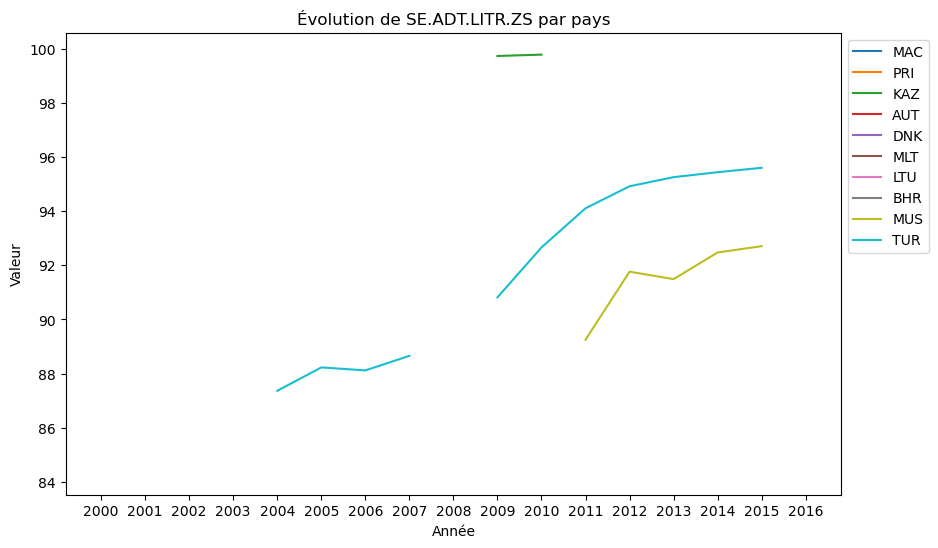

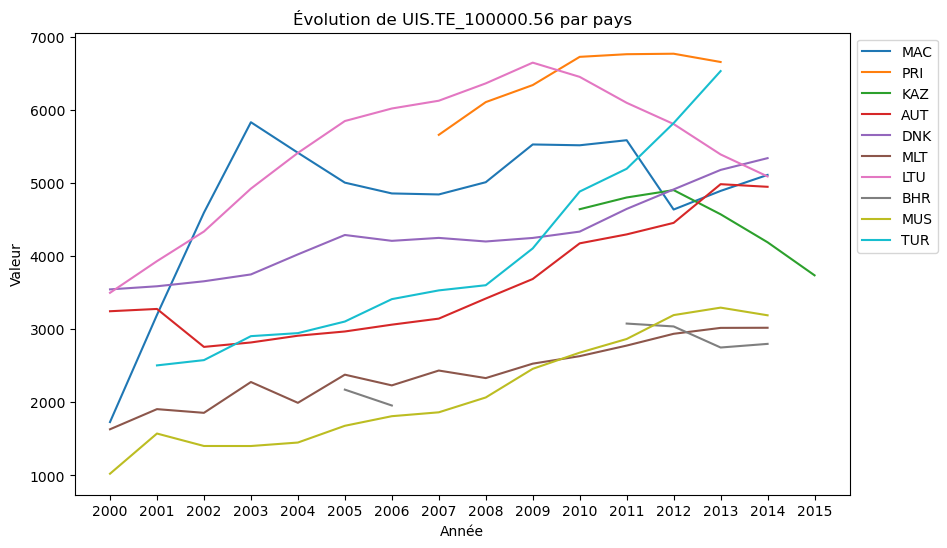

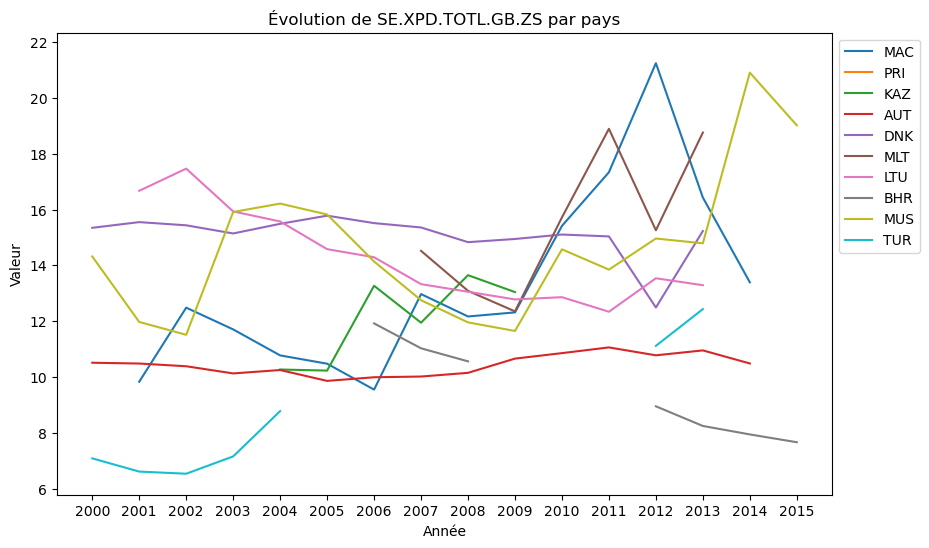

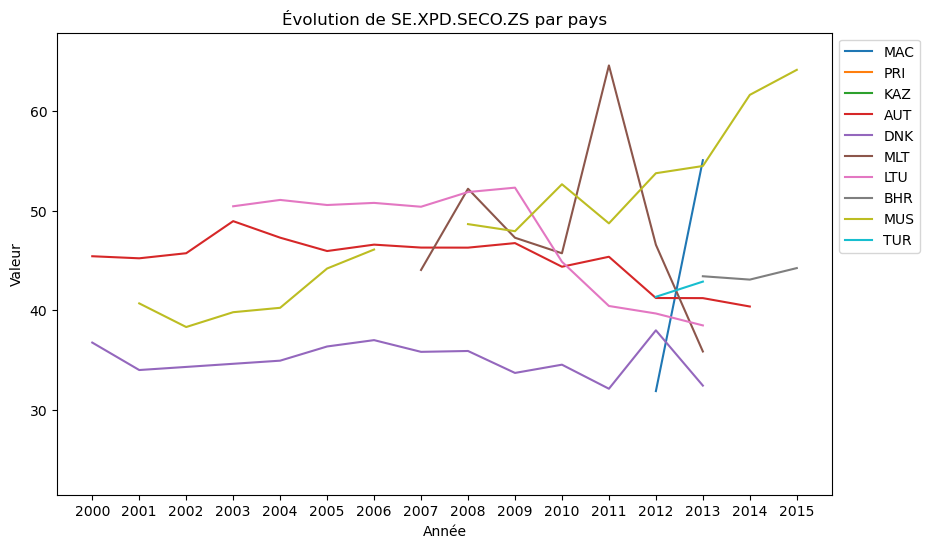

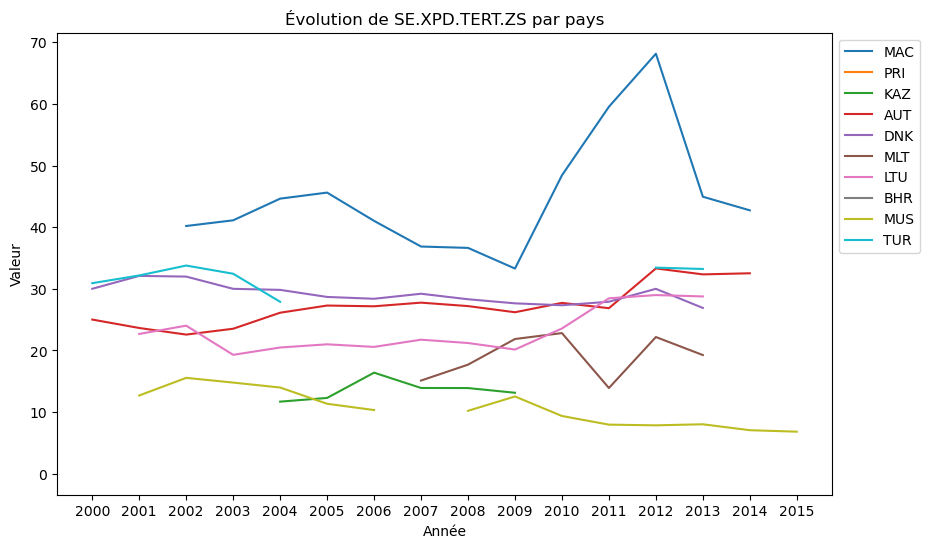

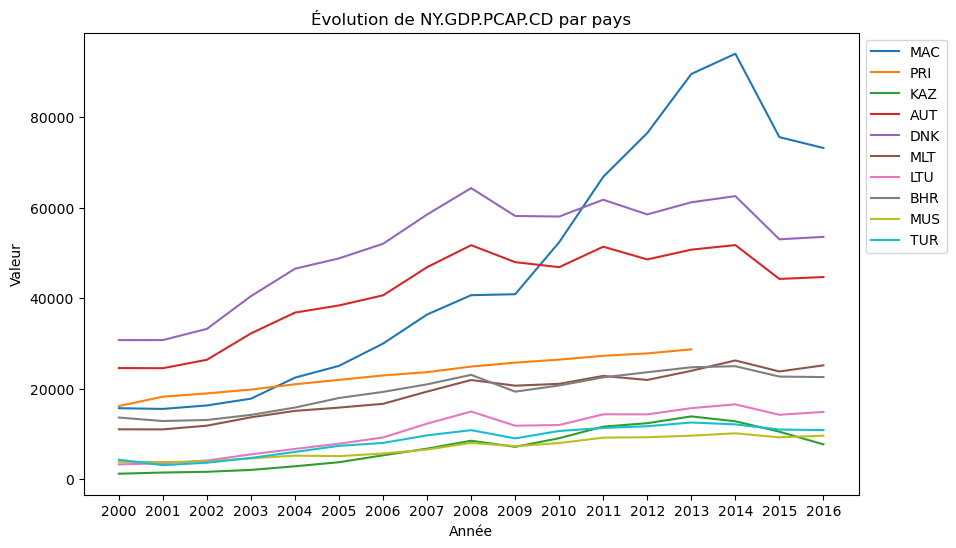

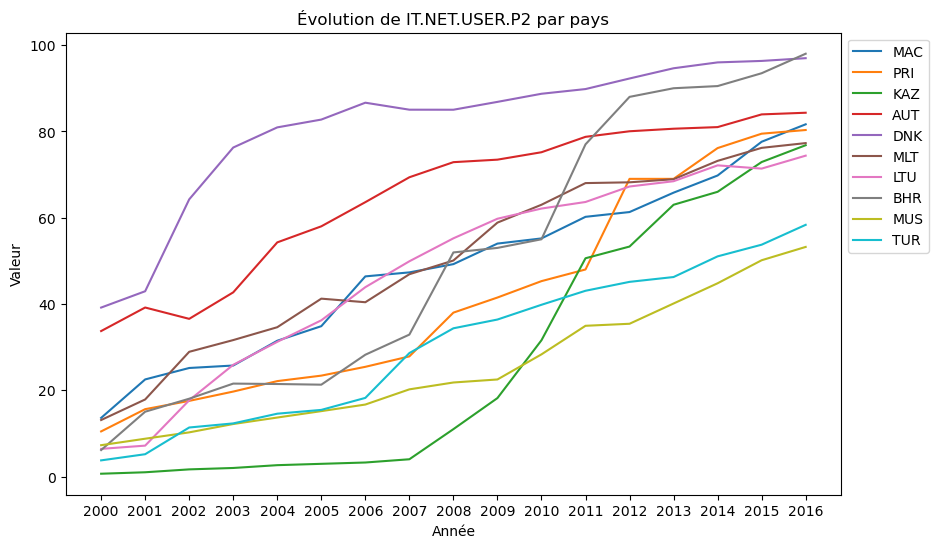

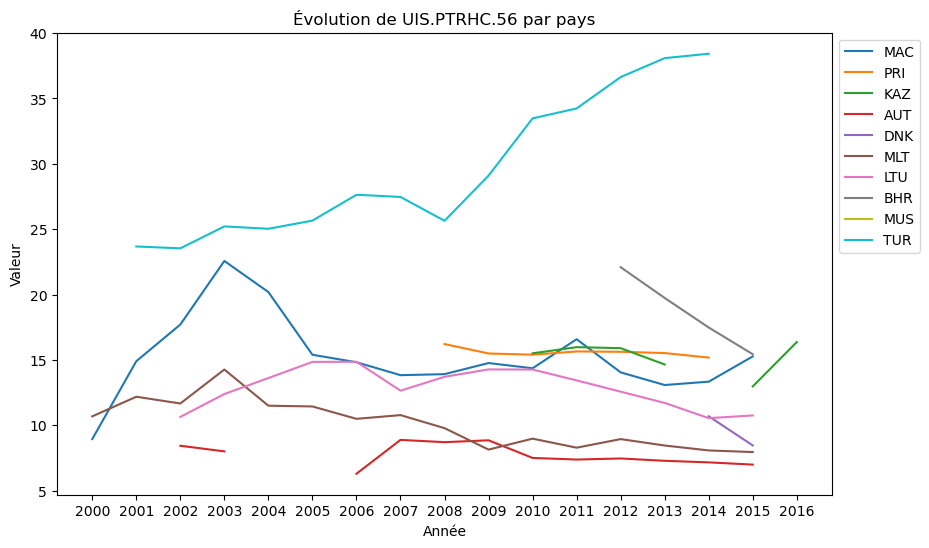

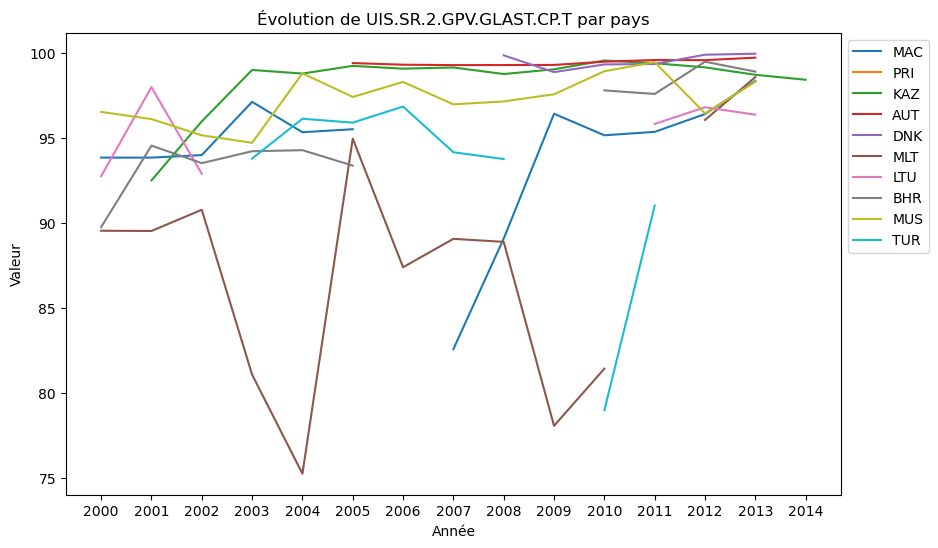

In [42]:
### EXPLORATION - Pour les 10 premiers pays, quelle est l'évolution des indicateurs à travers le temps ?

# Liste des pays à afficher
list_of_countries = list(top_10_countries["Country Code"])

# Liste des indicateurs à afficher
list_of_indicators = list(df_selected_values["Indicator Code"].unique())

# Boucle pour créer un graphique par indicateur
for indicator in list_of_indicators:
    
    if indicator not in ["SE.XPD.SE/TE.ZS", "UIS.SR/PTHRC"] :
        
        df_indicator = df[df['Indicator Code'] == indicator]

        # Paramètres du graphique
        plt.figure(figsize=(10, 6))
        plt.title(f'Évolution de {indicator} par pays')
        plt.xlabel('Année')
        plt.ylabel('Valeur')

        # Boucle pour ajouter une courbe pour chaque pays
        for country in list_of_countries:

            country_data = df_indicator[df_indicator['Country Code'] == country]

            plt.plot(country_data.columns[34:69], country_data.iloc[0, 34:69], label=country)

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

        plt.show()

## Exploration des indicateurs des pays frontaliers aux meilleurs pays

In [20]:
### EXPLORATION - Quelles sont les valeurs et scores pour chaque indicateur des pays frontaliers ?

# Stocke les indicateurs sans score pour les supprimer par la suite
indicators_without_score = ["SE.XPD.SECO.ZS", "SE.XPD.TERT.ZS", "UIS.SR.2.GPV.GLAST.CP.T"]

border_table_columns = ["Country Name"] + list(df_selected_values["Indicator Code"].unique()) + ["Cumulative Score"]
final_table_columns = [item for item in border_table_columns if item not in indicators_without_score]

border_table_result = pd.DataFrame(columns=final_table_columns)

for country in border_countries:
    country_row = {"Country Name": countries_dict[country]}
    cumulative_score=0
    
    for indicator in df_selected_values["Indicator Code"].unique():
        if indicator not in indicators_without_score:
            indicator_df = df_selected_values[(df_selected_values["Indicator Code"] == indicator) & (df_selected_values["Country Code"] == country)]

            if not indicator_df.empty:
                row = indicator_df.iloc[0]  
                value = row["Value"]
                score = row["Score"]

                country_row[indicator] = f"{value:.2f} || {score}"

                cumulative_score += score
    
    country_row["Cumulative Score"] = df_selected_values[df_selected_values["Country Code"]==country]["Score"].sum()
    
    country_row_df = pd.DataFrame([country_row])
    border_table_result = pd.concat([border_table_result, country_row_df], ignore_index=True)

border_table_result


,Country Name,SE.ADT.LITR.ZS,UIS.TE_100000.56,SE.XPD.TOTL.GB.ZS,NY.GDP.PCAP.CD,IT.NET.USER.P2,UIS.PTRHC.56,SE.XPD.SE/TE.ZS,UIS.SR/PTHRC,Cumulative Score
0,Cuba,99.75 || 2.0,2651.99 || 1.0,nan || 0.0,7602.26 || 0.0,38.77 || 0.0,4.60 || 0.0,1.16 || 1.0,21.14 || 2.0,6.0
1,Vietnam,93.52 || 2.0,2912.82 || 1.0,18.53 || 1.0,2214.39 || 0.0,46.50 || 0.0,27.05 || 1.0,2.64 || 1.0,3.31 || 0.0,6.0
2,China,95.12 || 2.0,3061.42 || 1.0,nan || 0.0,8123.18 || 0.0,53.20 || 1.0,19.49 || 1.0,nan || 0.0,4.51 || 0.0,5.0
3,Dominican Republic,91.99 || 2.0,4380.40 || 1.0,12.58 || 1.0,6722.22 || 0.0,61.33 || 1.0,25.53 || 1.0,1.24 || 1.0,3.42 || 0.0,7.0
4,Estonia,99.89 || 2.0,4909.36 || 2.0,14.26 || 1.0,17727.49 || 0.0,87.24 || 2.0,10.74 || 0.0,0.99 || 0.0,9.28 || 1.0,8.0
5,Latvia,99.90 || 2.0,4507.54 || 1.0,13.96 || 1.0,14064.66 || 0.0,79.89 || 2.0,12.56 || 0.0,1.46 || 1.0,7.74 || 0.0,7.0
6,Uzbekistan,99.98 || 2.0,985.27 || 0.0,nan || 0.0,2110.65 || 0.0,46.79 || 0.0,10.67 || 0.0,nan || 0.0,8.95 || 1.0,3.0
7,Kyrgyz Republic,99.24 || 2.0,4584.83 || 1.0,16.11 || 1.0,1077.04 || 0.0,34.50 || 0.0,12.82 || 0.0,nan || 0.0,7.53 || 0.0,4.0
8,United Arab Emirates,90.03 || 2.0,1574.49 || 0.0,nan || 0.0,37622.21 || 1.0,90.60 || 2.0,17.81 || 1.0,nan || 0.0,5.43 || 0.0,6.0
9,Qatar,97.75 || 2.0,1162.72 || 0.0,12.74 || 1.0,59324.34 || 2.0,94.29 || 2.0,12.94 || 0.0,nan || 0.0,7.69 || 0.0,7.0


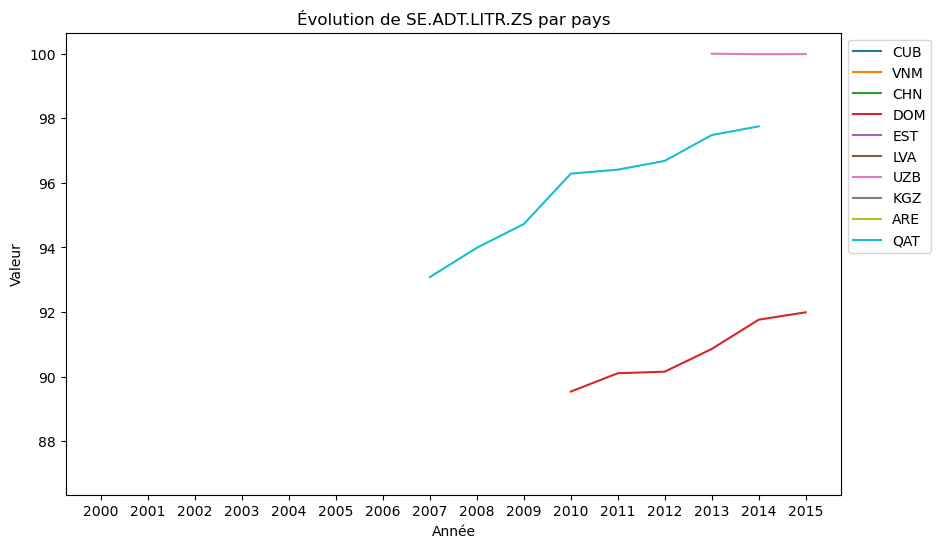

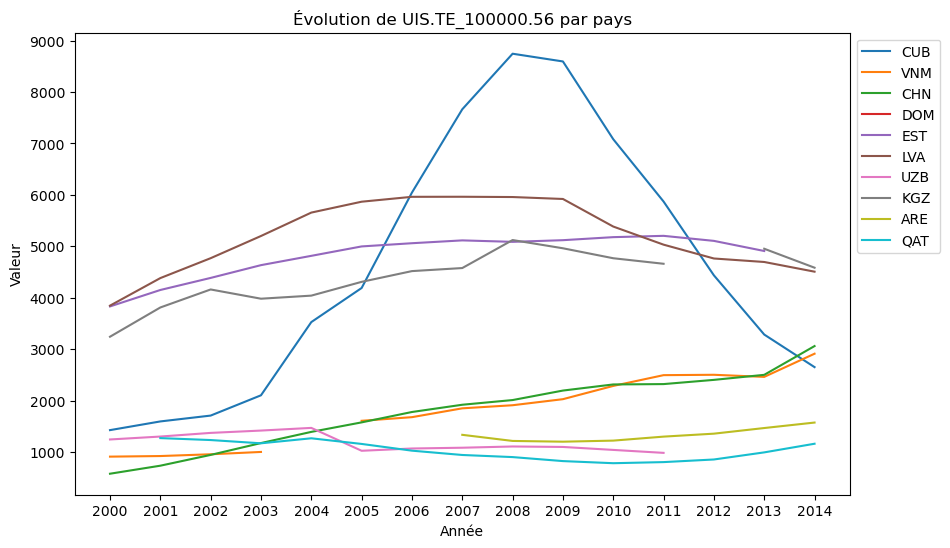

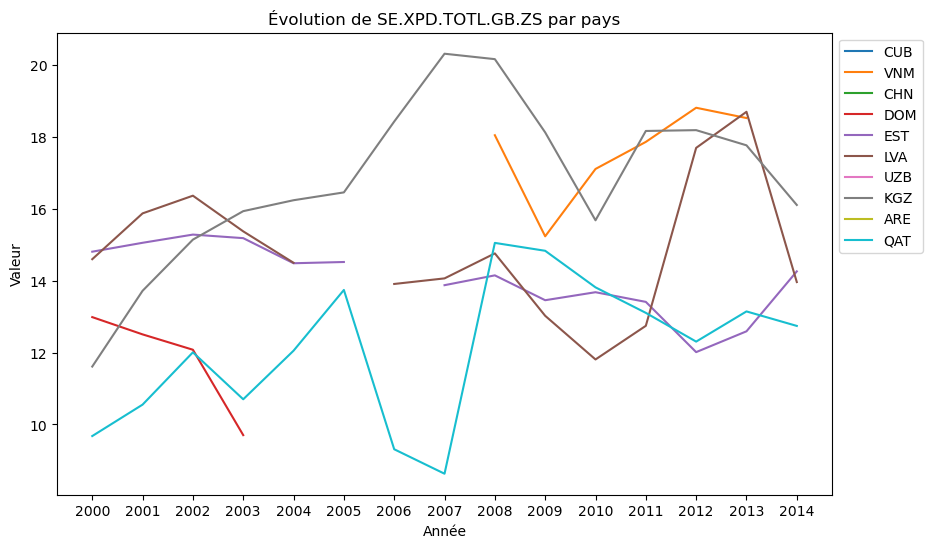

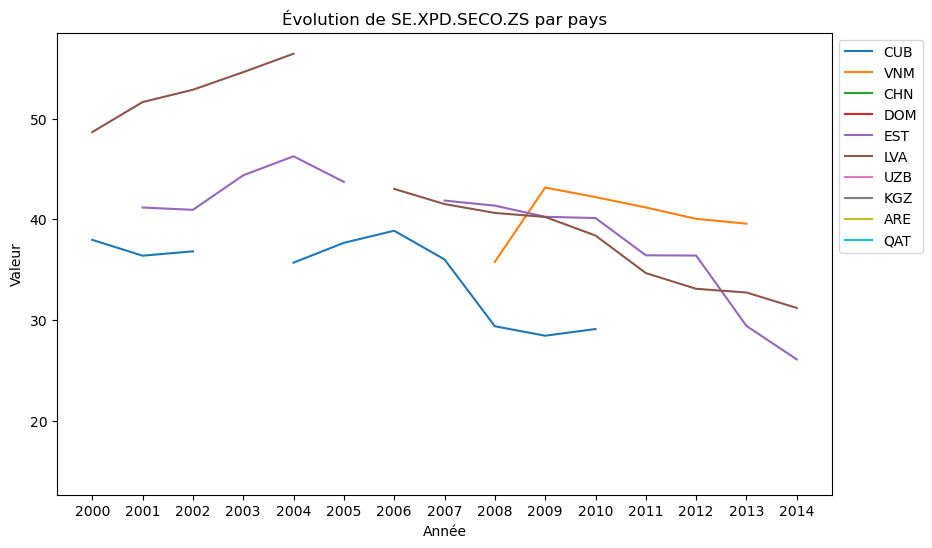

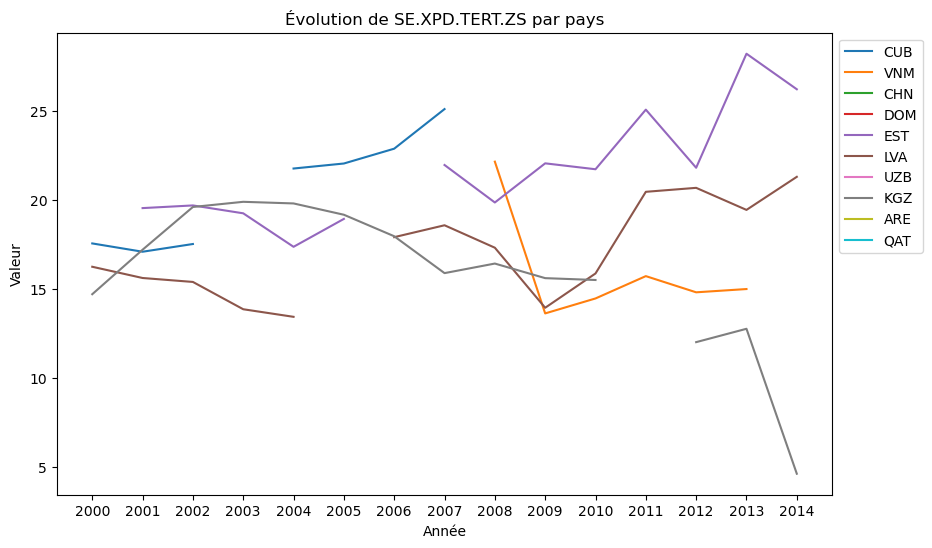

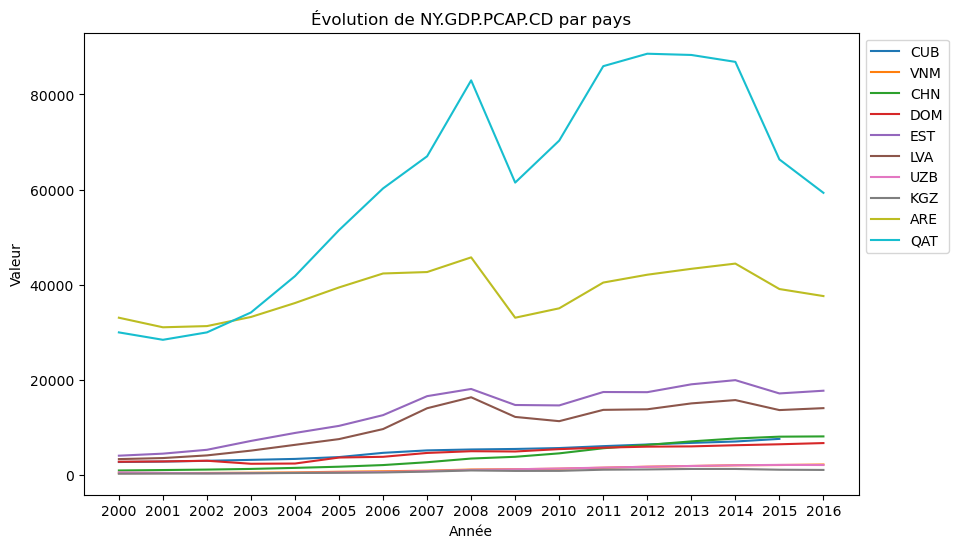

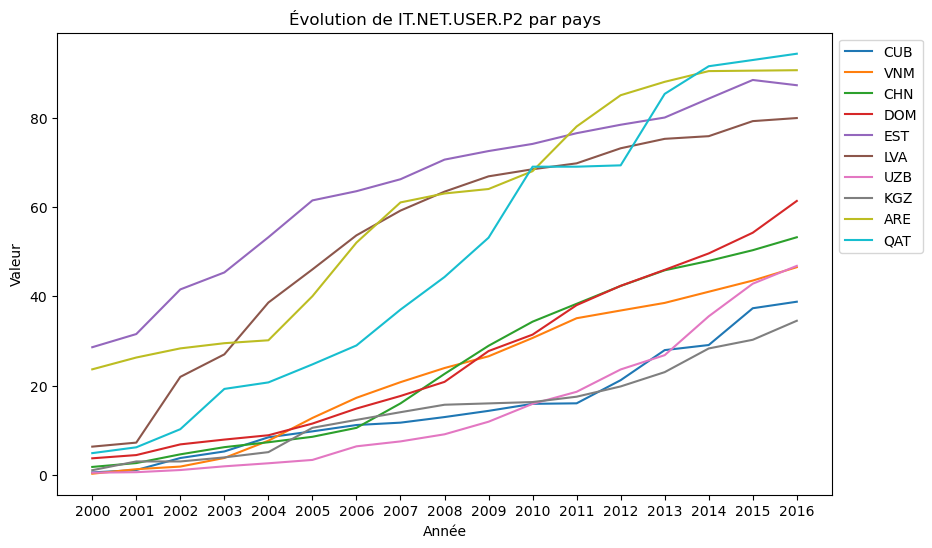

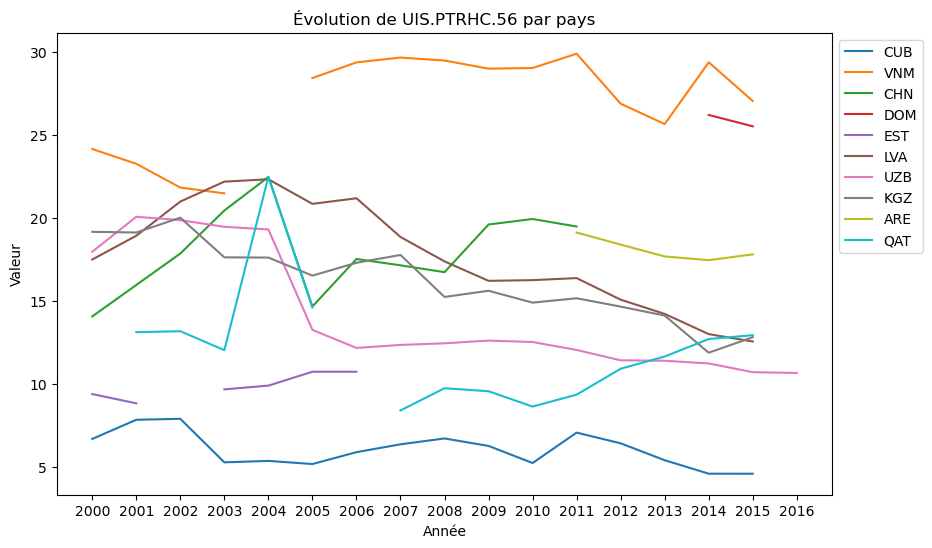

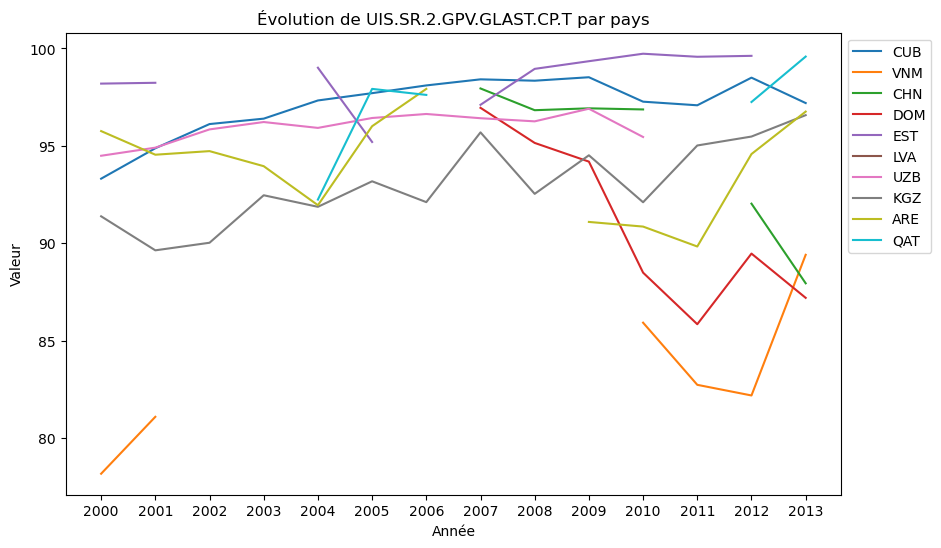

In [43]:
### EXPLORATION - Pour les pays frontaliers, quelle est l'évolution des indicateurs à travers le temps ?

# Liste des indicateurs à afficher
list_of_indicators = list(df_selected_values["Indicator Code"].unique())

# Boucle pour créer un graphique par indicateur
for indicator in list_of_indicators:

    if indicator not in ["SE.XPD.SE/TE.ZS", "UIS.SR/PTHRC"] :
        
        df_indicator = df[df['Indicator Code'] == indicator]

        # Paramètres du graphique
        plt.figure(figsize=(10, 6))
        plt.title(f'Évolution de {indicator} par pays')
        plt.xlabel('Année')
        plt.ylabel('Valeur')

        # Boucle pour ajouter une courbe pour chaque pays
        for country in border_countries:

            country_data = df_indicator[df_indicator['Country Code'] == country]

            plt.plot(country_data.columns[34:69], country_data.iloc[0, 34:69], label=country)

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

        plt.show()